<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:blue"><center>Series de tiempo con Darts</center></span>


<figure>
<center>
<img src="../Imagenes/Diamond_Fuji_time_series.jpg" width="300" height="100" align="center" /> 
</center>   
</figure>

<center>Fuente: <a href="https://commons.wikimedia.org/wiki/File:Diamond_Fuji_(time_series).jpg">Alpsdake</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Contenido</span>

* [Introducción](#Introducción)
* [Instalando Darts](#Instalando-Darts)
* [Construir y manipular TimeSeries](#Construir-y-manipular-TimeSeries)
* [Entrenando modelos de pronóstico y haciendo predicciones](#Entrenando-modelos-de-pronóstico-y-haciendo-predicciones)
* [Backtesting](#Backtesting:-simular-histórico-pronóstico)
* [Aprendizaje automático y modelos globales](#Aprendizaje-automático-y-modelos-globales)
* [Covariables: usando datos externos](#Covariables:-usando-datos-externos)
* [Modelos de pronóstico de regresión](#Modelos-de-pronóstico-de-regresión)
* [Pronósticos probabilísticos](#Pronósticos-probabilísticos)
* [Modelos ensamblados](#Modelos-ensamblados)
* [Modelos de filtrado](#Modelos-de-filtrado)

## <span style="color:#4361EE">Introducción</span>

El pronóstico de series temporales implica la creación de modelos a partir de datos históricos con marca de tiempo para realizar predicciones científicas e impulsar la toma de decisiones estratégicas en el futuro. El pronóstico de series de tiempo tiene muchos usos en varios dominios, que incluyen:

* Predecir la demanda de los consumidores para cada producto
* Pronóstico de la propagación de una pandemia, diagnóstico, medicación y planificación en el cuidado de la salud
* Detección de anomalías, ciberseguridad y mantenimiento predictivo
* Predecir si la infraestructura actual puede manejar el tráfico en el futuro cercano y lejano y muchos más.

El pronóstico de series temporales es un poco diferente del caso de uso de aprendizaje automático tradicional, ya que implica un ordenamiento temporal de los datos que deben tenerse en cuenta durante la ingeniería y el modelado de características.

### <span style="color:#4CC9F0"> Motivación</span>

Para entrenar un modelo de pronóstico de series temporales, termina en una situación en la que usa Pandas para el preprocesamiento, statsmodel para estacionalidad y pruebas estadísticas, scikit-learn o Facebook Prophet para pronósticos y código personalizado para implementar backtesting y selección de modelos.

La previsión de series temporales de un extremo a otro se convierte en una tarea tediosa para los científicos de datos, ya que las diferentes bibliotecas tienen distintas API y tipos de datos. Para los casos de uso de aprendizaje automático tradicionales, tenemos el paquete scikit-learn, que proporciona una API coherente para el modelado de aprendizaje automático de extremo a extremo.

Darts intenta ser un scikit-learn para series de tiempo, y su objetivo principal es simplificar todo el enfoque de pronóstico de series de tiempo. En este artículo, discutiremos el paquete de dardos y su implementación.

### <span style="color:#4CC9F0">Darts</span>

Darts es una biblioteca de Python para una fácil manipulación y pronóstico de series temporales. Ofrece implementaciones de una variedad de modelos, desde clásicos como ARIMA hasta redes neuronales profundas, que se pueden implementar de la misma manera que los modelos scikit-learn (usando API de ajuste y predicción).

Algunas de las características del paquete Darts son:

Está construido alrededor de la clase inmutable `TimeSeries`.

Tiene una interfaz API unificada y fácil de usar similar a scikit-learn como *fit()* y *predict()*.

Ofrece una variedad de modelos, desde modelos clásicos hasta enfoques ML/DL de última generación. Proporciona API para casos de uso de pronóstico de series temporales de extremo a extremo, incluido el descubrimiento de datos, el preprocesamiento de datos, el pronóstico y la selección y evaluación de modelos.

Aquí solo mostraremos algunos ejemplos mínimos de "inicio". Para obtener información más detallada, puede consultar la [guía de usuario](https://unit8co.github.io/darts/userguide.html) y [cuadernos de ejemplo](https://unit8co.github.io/darts/examples.html).

## <span style="color:#4361EE">Instalación de  Darts</span>

Recomendamos utilizar algún entorno virtual. Entonces hay principalmente dos formas.

Con pip:
```
pip install darts
```

Con conda
```
conda install -c conda-forge -c pytorch u8darts-all
```

consulte la [guía detallada de instalación](https://github.com/unit8co/darts#installation-guide) si tiene problemas o desea instalar un sabor diferente (evitando ciertas dependencias).

Primero, importemos algunas cosas:

In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import darts
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

## <span style="color:#4361EE">Construir y manipular `TimeSeries`</span>

`TimeSeries` es la clase de datos principal en Darts. Una 'TimeSeries' representa una serie temporal univariante o multivariante, con un índice de tiempo adecuado. El índice de tiempo puede ser del tipo `pandas.DatetimeIndex` (que contiene fechas y horas) o del tipo `pandas.RangeIndex` (que contiene números enteros; útil para representar datos secuenciales sin marcas de tiempo específicas). En algunos casos, `TimeSeries` puede incluso representar series *probabilísticas*, para, por ejemplo, obtener intervalos de confianza. Todos los modelos en Darts consumen `TimeSeries` y producen `TimeSeries`.

### <span style="color:#4CC9F0">Leer datos y construir una `TimeSeries`</span>

Desde un Pandas DataFrame completo, usando`TimeSeries` se puede construir fácilmente usando algunos métodos de fábrica:

* Desde un Pandas DataFrame completo, usando `TimeSeries.from_dataframe()` ([docs](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.from_dataframe)).
* A partir de un índice de tiempo y una matriz de valores correspondientes, utilizando `TimeSeries.from_times_and_values()` ([docs](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.from_times_and_values)).
* De una matriz de valores NumPy, usando `TimeSeries.from_values()` ([docs](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.from_values)).
* De una `Series` de Pandas, usando `TimeSeries.from_series()` ([docs](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.from_series)).
* De un `xarray.DataArray`, usando `TimeSeries.from_xarray()` ([docs](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.from_xarray)).
* Desde un archivo CSV, usando  `TimeSeries.from_csv()` ([docs](https://unit8co.github.io/darts/generated_api/darts.timeseries.html#darts.timeseries.TimeSeries.from_csv)).

A continuación, obtenemos una 'TimeSeries' al cargar directamente la serie de pasajeros aéreos de uno de los conjuntos de datos disponibles en Darts:

<Axes: xlabel='Month'>

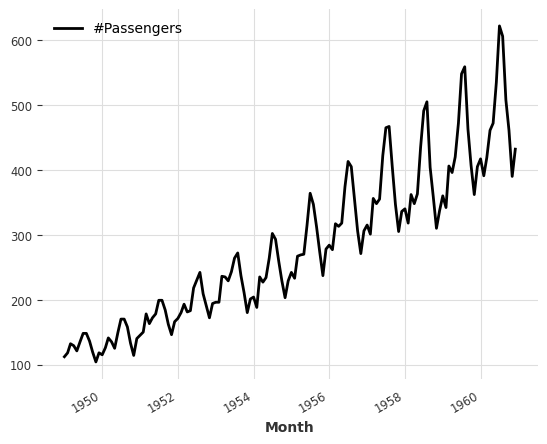

In [4]:
series = AirPassengersDataset().load()
series.plot()
plt.show()

### <span style="color:#4CC9F0">Lectura de datos desde un dataframe</span>

In [5]:
import pandas as pd 
df = pd.read_csv("../Datos/AirPassengers.csv")
df.head()

,Mes,Pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### <span style="color:#4CC9F0">Transforma la columna Mes en tipo fecha</span>

In [7]:
df['Mes'] = pd.to_datetime(df['Mes'], format='%Y-%m')
print(df.head())

            Mes  Pasajeros
time                      
0    1949-01-01        112
1    1949-02-01        118
2    1949-03-01        132
3    1949-04-01        129
4    1949-05-01        121


### <span style="color:#4CC9F0">Transforma la columna Mes en index del dataframe</span>

In [9]:
df.index = df['Mes']
del df['Mes']
print(df.head())

            Pasajeros
Mes                  
1949-01-01        112
1949-02-01        118
1949-03-01        132
1949-04-01        129
1949-05-01        121


### <span style="color:#4CC9F0">Sube el datframe a un objetso TimeSeries</span>

In [12]:
series = TimeSeries.from_dataframe(df, value_cols='Pasajeros')

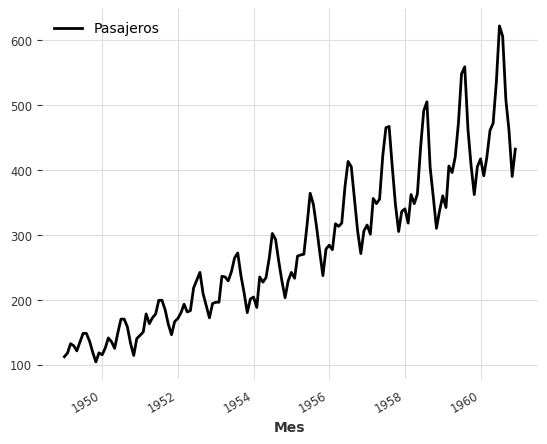

In [15]:
series.plot()
plt.show()

### <span style="color:#4CC9F0">Algunas operaciones `TimeSeries`</span>

`TimeSeries` soporta diferentes tipos de operaciones - aquí hay algunos ejemplos.

#### <span style="color:#4CC9F0">Separar</span>

También podemos dividir en una fracción de la serie, en un `Timestamp` de pandas o en un valor de índice entero.

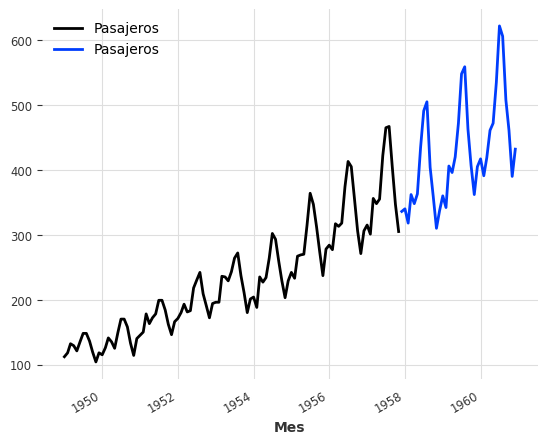

In [17]:
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()
plt.show()

#### <span style="color:#4CC9F0">Rebanar</span>

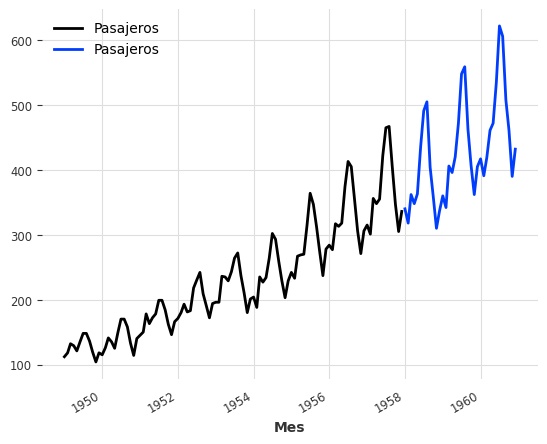

In [21]:
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()
plt.show()

### <span style="color:#4CC9F0">Operaciones aritméticas</span>

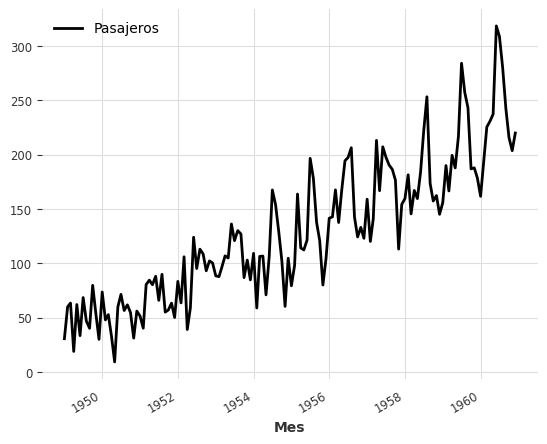

In [20]:
series_noise = TimeSeries.from_times_and_values(
    series.time_index, np.random.randn(len(series))
)
(series / 2 + 20 * series_noise - 10).plot()
plt.show()

#### <span style="color:#4CC9F0">Apilado</span>

Concatenar una nueva dimensión para producir una nueva serie única multivariante.

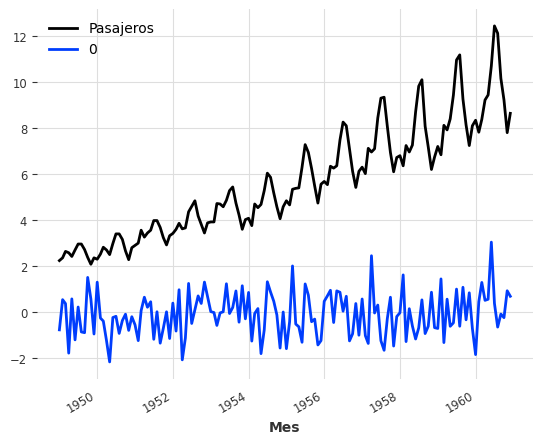

In [23]:
(series / 50).stack(series_noise).plot()
plt.show()

#### <span style="color:#4CC9F0">Mapeo</span>

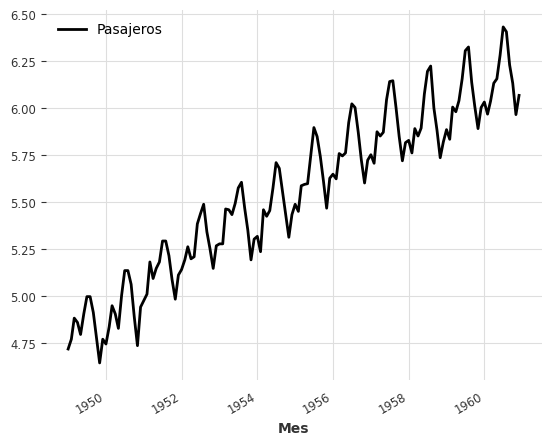

In [25]:
series.map(np.log).plot()
plt.show()

#### <span style="color:#4CC9F0">Mapeo usando marcas de tiempo y valores</span>

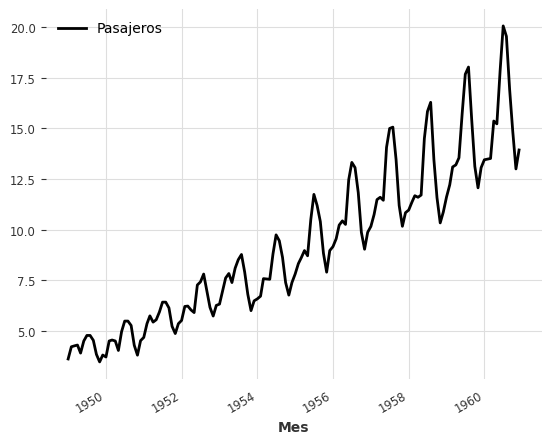

In [27]:
series.map(lambda ts, x: x / ts.days_in_month).plot()
plt.show()

#### <span style="color:#4CC9F0">Agregar algún atributo de fecha y hora como una dimensión adicional para producir una serie multivariante</span>

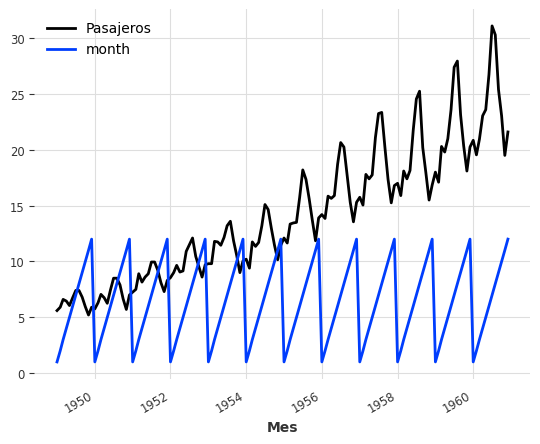

In [30]:
(series / 20).add_datetime_attribute("month").plot()
plt.show()

#### <span style="color:#4CC9F0"> Agregando algún componente binario de días festivos</span>

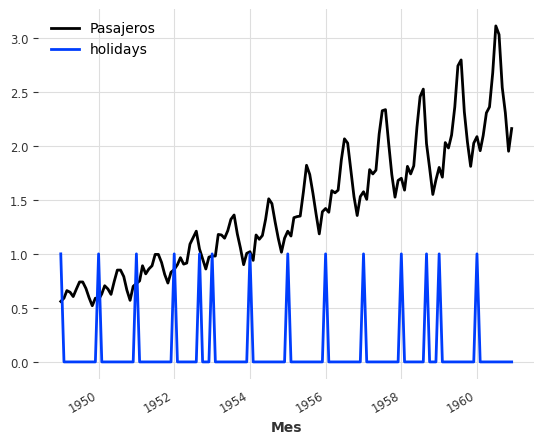

In [33]:
(series / 200).add_holidays("US").plot()
plt.show()

#### <span style="color:#4CC9F0">Diferenciando</span> 

Diferenciar una serie de tiempo implica calcular la diferencia entre valores consecutivos de la serie. Esto se hace para eliminar o reducir la tendencia y la estacionalidad presentes en la serie, dejando una serie estacionaria. La diferenciación es una técnica común utilizada en el análisis de series de tiempo para lograr la estacionariedad y hacer que la serie sea más fácil de modelar y predecir.

El proceso de diferenciación se realiza restando el valor de un período anterior al valor del período actual. Esto se puede hacer de diferentes órdenes, dependiendo de la cantidad de diferenciación requerida para hacer que la serie sea estacionaria. La serie resultante después de la diferenciación se conoce como la primera diferencia, y se puede repetir el proceso para obtener la segunda diferencia, la tercera diferencia, y así sucesivamente.

La diferenciación de una serie de tiempo puede ayudar a cumplir dos objetivos principales:

Eliminar la tendencia: La tendencia se refiere a la dirección general y persistente en la serie de tiempo a lo largo del tiempo. Al restar los valores consecutivos, se pueden eliminar o reducir las fluctuaciones de la tendencia, lo que permite analizar y modelar más fácilmente las variaciones estacionarias.

Eliminar la estacionalidad: La estacionalidad se refiere a patrones regulares y recurrentes en la serie de tiempo que se repiten en intervalos específicos. Al diferenciar la serie, se pueden eliminar o reducir los efectos de la estacionalidad, lo que facilita la identificación de patrones más sutiles o residuales en la serie.

La diferenciación de series de tiempo es una técnica común en el análisis y pronóstico de datos de series temporales. Puede ser utilizada en combinación con otros métodos, como modelos autoregresivos (AR), modelos de promedio móvil (MA) o modelos autorregresivos de promedio móvil (ARMA), para lograr una mejor comprensión y predicción de las series de tiempo.



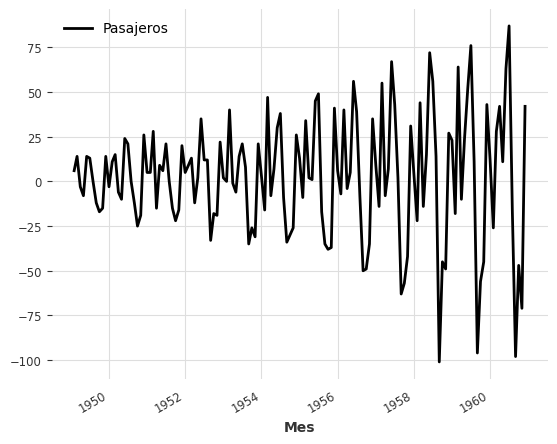

In [38]:
series.diff(n=1).plot() #n= orden de diferenciación
plt.show()

#### <span style="color:#4CC9F0">Rellenar valores faltantes usando una función `utils`</span>

Los valores faltantes están representados por `np.nan`.

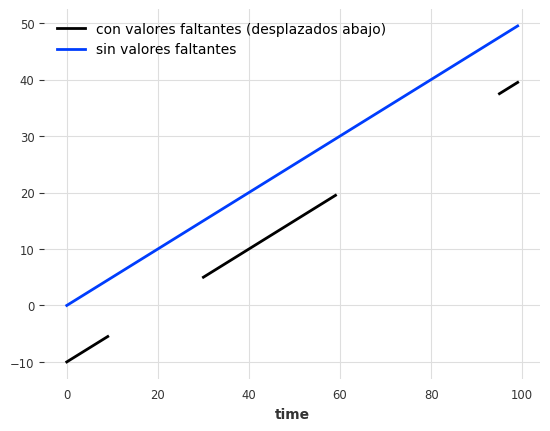

In [12]:
from darts.utils.missing_values import fill_missing_values

values = np.arange(50, step=0.5)
values[10:30] = np.nan
values[60:95] = np.nan
series_ = TimeSeries.from_values(values)

(series_ - 10).plot(label="con valores faltantes (desplazados abajo)")
fill_missing_values(series_).plot(label="sin valores faltantes")

#### <span style="color:#4CC9F0">Creando una serie de entrenamiento y validación</span>

Para lo que sigue, dividiremos nuestra `TimeSeries` en una serie de entrenamiento y una de validación. 

**Nota**: 

En general, también es una buena práctica mantener a un lado una serie de pruebas y nunca tocarla hasta el final del proceso. Aquí, solo creamos una serie de entrenamiento  y una de validación para simplificar.

La serie de entrenamiento será una `TimeSeries` que contenga valores hasta enero de 1958 (excluidos), y la serie de validación una `TimeSeries` que contenga el resto:

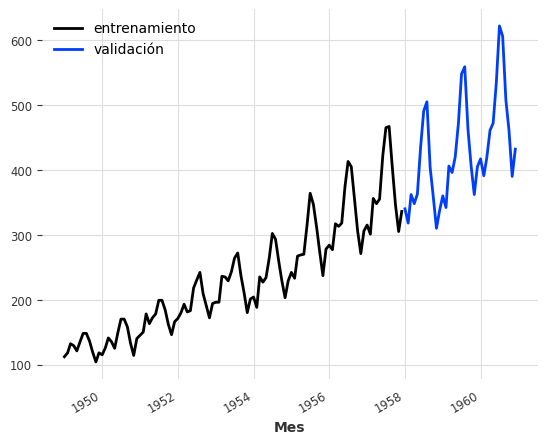

In [47]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="entrenamiento")
val.plot(label="validación")
plt.show()

## <span style="color:#4361EE">Autocorrelación</span>

Verificar la autocorrelación de los datos de series temporales es otra parte importante del proceso analítico. Esta es una medida de cuán correlacionados están los datos de series temporales en un momento dado con los valores pasados, lo que tiene enormes implicaciones en muchas industrias. Por ejemplo, si nuestros datos de pasajeros tienen una fuerte autocorrelación, podemos suponer que un número elevado de pasajeros hoy sugiere una gran probabilidad de que también sea alto mañana.

El marco de datos de Pandas tiene un método de autocorrelación que podemos usar para calcular la autocorrelación en nuestros datos de pasajeros. Hagamos esto con un retraso de un mes:

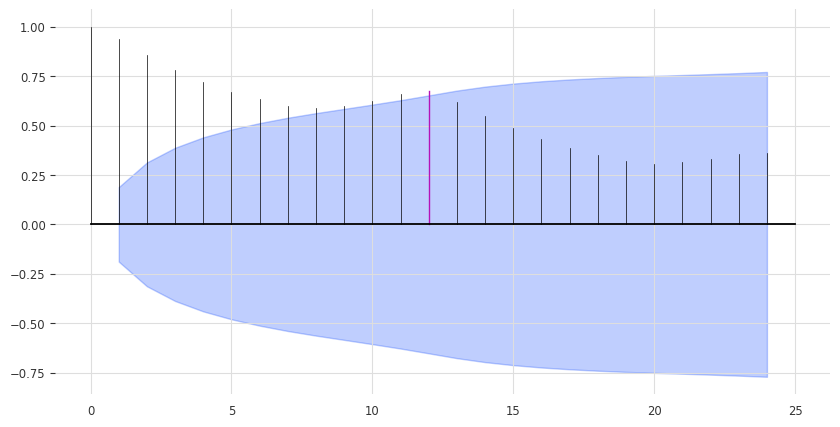

In [53]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

## <span style="color:#4361EE">Autocorrelación Parcial</span>

la función de autocorrelación parcial (PACF) proporciona la correlación parcial de una serie de tiempo estacionaria con sus propios valores rezagados, haciendo una regresión de los valores de la serie de tiempo en todos los rezagos más cortos. Contrasta con la función de autocorrelación, que no controla otros rezagos.

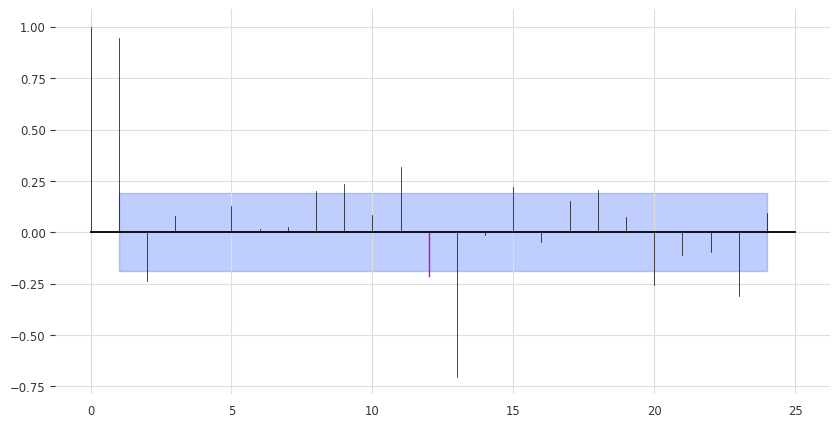

In [54]:
plot_pacf(train, m=12, alpha=0.05)

## <span style="color:#4361EE">Chequeo de la Estacionalidad</span>

La estacionalidad es un comportamiento o patrón que a veces observamos en una serie de tiempo. Consiste en subidas y bajadas periódicas que se presentan en forma regular en la serie de tiempo. Al tiempo entre un ''pico'' y otro en una serie de datos, se le llama período estacional. La siguiente  utIlidad de Darts Comprueba si la serie es es estacional con período m o no. Si m es None, trabajamos bajo el supuesto de que existe un período de estacionalidad único, que se infiere de la Función de Autocorrelación (ACF).

In [55]:
darts.utils.statistics.check_seasonality(train, m=None, max_lag=24, alpha=0.05)

(True, 12)

In [58]:
darts.utils.statistics.extract_trend_and_seasonality(train)

(<TimeSeries (DataArray) (Mes: 108, component: 1, sample: 1)>
 array([[[118.58848096]],
 
        [[119.73416861]],
 
        [[120.87985625]],
 
        [[122.0255439 ]],
 
        [[123.17123155]],
 
        [[124.31691919]],
 
        [[126.79166667]],
 
        [[127.25      ]],
 
        [[127.95833333]],
 
        [[128.58333333]],
 
 ...
 
        [[357.625     ]],
 
        [[361.375     ]],
 
        [[364.5       ]],
 
        [[367.16666667]],
 
        [[370.56012044]],
 
        [[374.08109946]],
 
        [[377.60207848]],
 
        [[381.1230575 ]],
 
        [[384.64403652]],
 
        [[388.16501554]]])
 Coordinates:
   * Mes        (Mes) datetime64[ns] 1949-01-01 1949-02-01 ... 1957-12-01
   * component  (component) <U1 '0'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (Mes: 108, component: 1, sample: 1)>
 array([[[0.91307295]],
 
        [[0.90577375]],
 
        [[1.03385785

In [ ]:
darts.utils.statistics.extract_trend_and_seasonality(train, )



## <span style="color:#4361EE">Estacionariedad</span>

La estacionariedad es una parte clave del análisis de series de tiempo. En pocas palabras, la estacionariedad significa que la forma en que cambian los datos de las series temporales es constante. Una serie temporal estacionaria no tendrá tendencias ni patrones estacionales. Debe verificar la estacionariedad porque no solo facilita el modelado de series de tiempo, sino que también es una suposición subyacente en muchos métodos de series de tiempo. Específicamente, se asume estacionariedad para una amplia variedad de métodos de pronóstico de series temporales, incluidos el promedio móvil autorregresivo (ARMA), ARIMA y ARIMA estacional (SARIMA).

Usaremos la prueba de Dickey Fuller para verificar la estacionariedad de nuestros datos. La Prueba de Dickey-Fuller busca determinar la existencia o no de raíces unitarias en una serie de tiempo. La hipótesis nula de esta prueba es que existe una raíz unitaria en la serie.


Esta prueba generará valores críticos y un valor $p$, que nos permitirá aceptar o rechazar la hipótesis nula de que no existe estacionariedad. Si rechazamos la hipótesis nula, eso significa que aceptamos la alternativa, que establece que existe estacionariedad. 
Estos valores nos permiten probar el grado en que los valores presentes cambian con los valores pasados. Si no hay estacionariedad en el conjunto de datos, un cambio en los valores actuales no provocará un cambio significativo en los valores pasados.

Para detalles de la prueba puede revisar en [Wikipedia](https://es.wikipedia.org/wiki/Prueba_de_Dickey-Fuller).




In [44]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


In [57]:
darts.utils.statistics.stationarity_test_kpss(train, regression='c', nlags='auto')

C:\ProgramData\Anaconda3\envs\diplomado_cd\Lib\site-packages\darts\utils\statistics.py:454: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)


(1.5251526297439721,
 0.01,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## <span style="color:blue">Selección de un modelo ARIMA</span>

ARIMA significa Media Móvil Integrada Auto Regresiva. Existen modelos ARIMA estacionales y no estacionales que se pueden utilizar para realizar pronósticos.

### <span style="color:#4CC9F0">Modelo ARIMA no estacional</span>

Este modelo tiene tres variables a tener en cuenta.

+ P = Períodos a retrasar, por ejemplo: (si P = 3 entonces usaremos los tres períodos anteriores de nuestra serie de tiempo en la parte autorregresiva del cálculo) P ayuda a ajustar la línea que se está ajustando para pronosticar la serie. 

**Los modelos puramente autorregresivos se asemejan a una regresión lineal donde las variables predictivas son el número P de períodos anteriores**.

+ D = En un modelo ARIMA transformamos una serie de tiempo en estacionaria (series sin tendencia ni estacionalidad) mediante diferenciación. D se refiere al número de transformaciones diferenciadoras requeridas por la serie de tiempo para volverse estacionaria. `Una serie de tiempo estacionaria es cuando la media y la varianza son constantes en el tiempo`. Es más fácil predecir cuando la serie es estacionaria. 

`La diferenciación es un método para transformar una serie de tiempo no estacionaria en una estacionaria. Este es un paso importante en la preparación de datos que se utilizarán en un modelo ARIMA`. 

El primer valor de diferenciación es la diferencia entre el período de tiempo actual y el período de tiempo anterior. Si estos valores no giran en torno a una media y una varianza constantes, entonces encontramos la segunda diferenciación utilizando los valores de la primera diferenciación. Repetimos esto hasta obtener una serie estacionaria. 

La mejor manera de determinar si la serie está suficientemente diferenciada o no es **trazar la serie diferenciada y verificar si hay una media y una varianza constantes**.

+ Q = Esta variable denota el rezago del componente de error, donde el componente de error es parte de la serie temporal que no se explica por tendencia o estacionalidad.

#### <span style="color:#4CC9F0">Gráfico de función de autocorrelación (ACF)</span>

La autocorrelación se refiere a qué tan correlacionada está una serie de tiempo con sus valores pasados, mientras que el ACF es el gráfico utilizado para ver la correlación entre los puntos, hasta la unidad de retraso inclusive. En ACF, el coeficiente de correlación está en el eje x, mientras que el número de retrasos se muestra en el eje y.

El gráfico de la función de autocorrelación le permitirá saber cómo se correlaciona la serie de tiempo dada consigo misma.

Normalmente, en un modelo ARIMA, utilizamos el término AR o el término MA. Usamos ambos términos solo en raras ocasiones. Usamos el gráfico ACF para decidir cuál de estos términos usaríamos para nuestra serie de tiempo.

* Si hay una autocorrelación positiva en el retraso 1, entonces usamos el modelo AR

* Si hay una autocorrelación negativa en el retraso 1, entonces usamos el modelo MA

#### <span style="color:#4CC9F0">Gráfico de función de autocorrelación parcial (PACF)</span>

Después de trazar el gráfico ACF, pasamos a los gráficos de función de autocorrelación parcial (PACF). Una autocorrelación parcial es un resumen de la relación entre una observación en una serie de tiempo con observaciones en pasos de tiempo anteriores sin las relaciones de las observaciones intermedias.

`La autocorrelación parcial en el rezago k es la correlación que resulta después de eliminar el efecto de cualquier correlación debida a los términos en rezagos más cortos`.

**Si el gráfico PACF cae en el retraso n, entonces usamos un modelo AR(n) y si la caída en PACF es más gradual entonces usamos el término MA**

#### <span style="color:#4CC9F0">Componente autoregresivo</span>

Un modelo puramente *AR* pronostica solo usando una combinación de valores pasados, algo así como una regresión lineal donde la cantidad de términos *AR* utilizados es directamente proporcional a la cantidad de períodos anteriores tomados en consideración para el pronóstico.

Utilice términos AR en el modelo cuando

* Los gráficos ACF muestran que la autocorrelación decae hacia cero
* La trama PACF se corta rápidamente hacia cero
* El ACF de una serie estacionaria muestra positivo en el retardo 1

#### <span style="color:#4CC9F0">Promedios móviles</span>

Saltos aleatorios en la trama de la serie temporal cuyo efecto se siente en dos o más períodos consecutivos. Estos saltos representan el error calculado en nuestro modelo ARIMA y representan el retraso del componente *MA*. Un modelo puramente *MA* suavizaría estos saltos repentinos como el método de suavizado exponencial.

Utilice términos *MA* en el modelo cuando el modelo sea

* Autocorrelacionado negativamente en el retraso: 1
* ACF que cae bruscamente después de algunos retrasos
* PACF disminuye más gradualmente

#### <span style="color:#4CC9F0">Componente integrado </span>

Este componente entra en acción cuando la serie temporal no es estacionaria. El número de veces que tenemos que diferenciar la serie para volverla estacionaria es el parámetro (i-término) para el componente integrado.

Podemos representar nuestro modelo como ARIMA(ar-term, ma-term, i-term)

Encontrar el modelo correcto es un proceso iterativo.

### <span style="color:#4CC9F0">Modelos ARIMA estacionales (SARIMA) </span>

Como sugiere el nombre, este modelo se utiliza cuando la serie temporal presenta estacionalidad. Este modelo es similar a los modelos ARIMA, solo tenemos que agregar algunos parámetros para tener en cuenta las estaciones.

Escribimos SARIMA como

ARIMA(p,d,q)(P, D, Q)m,

* p - el número de autorregresivos
* d - grado de diferenciación
* q - el número de términos de media móvil
- m — se refiere al número de períodos en cada estación
* (P, D, Q): representa (p,d,q) para la parte estacional de la serie temporal

La diferenciación estacional tiene en cuenta las estaciones y las diferencias entre el valor actual y su valor en la temporada anterior, por ejemplo: la diferencia para el mes de mayo sería el valor en mayo de 2018 — valor en mayo de 2017.

* En el modelo AR puramente estacional, el ACF decae lentamente mientras que el PACF se reduce a cero
* Los modelos AR se utilizan cuando la autocorrelación estacional es positiva
* En el modelo MA puramente estacional, el ACF se reduce a cero y viceversa
* Los modelos MA se utilizan cuando la autocorrelación estacional es negativa

### <span style="color:#4CC9F0">Pasos finales</span>

* **Paso 1: verificar la estacionariedad**: si una serie de tiempo tiene un componente de tendencia o estacionalidad, debe volverse estacionaria antes de que podamos usar ARIMA para pronosticar. .
* **Paso 2: Diferenciar**: si la serie temporal no es estacionaria, es necesario estacionariarla mediante diferenciación. Tome la primera diferencia y luego verifique la estacionariedad. Tome tantas diferencias como sea necesario. Asegúrese de comprobar también las diferencias estacionales.
* **Paso 3: filtrar una muestra de validación**: esto se utilizará para validar la precisión de nuestro modelo. Utilice la división de validación de pruebas de tren para lograr esto
* **Paso 4: seleccionar los términos AR y MA**: utilice el ACF y el PACF para decidir si desea incluir términos AR, términos MA o ambos.
* **Paso 5: Construir el modelo**: cree el modelo y establezca el número de períodos a pronosticar en N (depende de sus necesidades).
* **Paso 6: Validar el modelo**: comparar los valores previstos con los reales en la muestra de validación.

## <span style="color:blue">Entrenando modelos de pronóstico y haciendo predicciones</span>

### <span style="color:#4CC9F0">Jugando con modelos de juguete</span>

Hay una colección de modelos de línea de base "ingenuos" en Darts, que pueden ser muy útiles para tener una idea de la precisión mínima que uno podría esperar. Por ejemplo, el modelo `NaiveSeasonal(K)` siempre "repite" el valor que ocurrió hace `K` pasos de tiempo.

En su forma más ingenua, cuando `K=1`, este modelo simplemente siempre repite el último valor de la serie de entrenamiento:

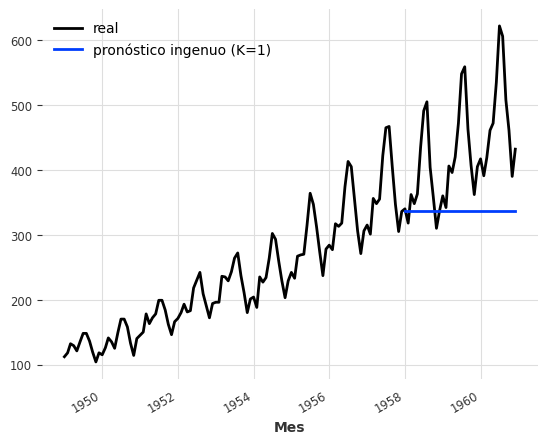

In [48]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="real")
naive_forecast.plot(label="pronóstico ingenuo (K=1)")
plt.show()

Es muy fácil ajustar modelos y producir predicciones en `TimeSeries`. Todos los modelos tienen una función `fit()` y `predict()`. Esto es similar a [Scikit-learn](https://scikit-learn.org/), excepto que es específico para series temporales. La función `fit()` toma como argumento la serie de tiempo de entrenamiento en la que se ajusta el modelo, y la función `predict()` toma como argumento el número de pasos de tiempo (después del final de la serie de entrenamiento) sobre los cuales se pronostica .

#### <span style="color:#4CC9F0">Inspeccionar la estacionalidad</span>

Nuestro modelo anterior es quizás  demasiado ingenuo. Ya podemos mejorar explotando la estacionalidad de los datos. Parece bastante obvio que los datos tienen una estacionalidad anual, lo que podemos confirmar observando la función de autocorrelación (ACF) y resaltando el retraso `m=12`:

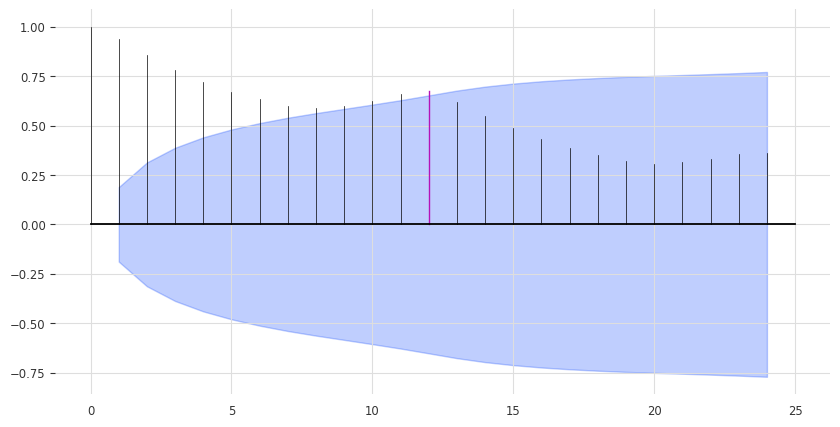

In [49]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

In [ ]:
help()

El ACF (Autocorrelation Function) en series de tiempo es una función que muestra la correlación entre los valores pasados de una serie de tiempo y los valores actuales. En otras palabras, el ACF muestra cómo se relaciona cada observación en una serie de tiempo con las observaciones anteriores en diferentes retrasos o desfases.

El ACF se calcula mediante el coeficiente de correlación de Pearson entre la serie original y una versión desplazada de sí misma. Para cada retraso o desfase, se calcula el coeficiente de correlación y se representa en un gráfico de barras o en una función de autocorrelación.

El gráfico del ACF es útil para analizar la estructura de correlación en una serie de tiempo y puede proporcionar información sobre la estacionalidad, la tendencia y otros patrones presentes en los datos. Algunos puntos clave al interpretar el gráfico del ACF son:

* Si el ACF muestra una correlación significativa en el primer desfase (lag 1), indica que los valores adyacentes en la serie de tiempo están correlacionados. Esto sugiere una posible dependencia serial en los datos.

* Si el ACF muestra una autocorrelación significativa en múltiples desfases, sugiere que la serie de tiempo puede tener un patrón estacional o una tendencia autoregresiva.

* Si el ACF muestra autocorrelaciones que van disminuyendo gradualmente a medida que aumenta el desfase, indica que la serie de tiempo puede seguir un modelo de decaimiento exponencial o un modelo autoregresivo de orden finito (AR).

* Si el ACF muestra una autocorrelación significativa solo en el desfase 0 (lag 0) y es cercana a cero para todos los demás desfases, sugiere que la serie de tiempo es ruidosa o aleatoria sin correlación serial.

El análisis del ACF puede ayudar a seleccionar el orden adecuado para modelos de series de tiempo, como modelos AR, modelos de promedio móvil (MA) o modelos autorregresivos de promedio móvil (ARMA). También puede proporcionar información útil para el diagnóstico y ajuste de modelos de series de tiempo.

El ACF presenta un pico en x = 12, lo que sugiere una tendencia de estacionalidad anual (resaltada en rojo). La zona azul determina la importancia de las estadísticas para un nivel de confianza de 𝛼=5%
 . También podemos realizar una verificación estadística de estacionalidad para cada período candidato $m$:

In [16]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("Hay estacionalidad de orden {}.".format(period))

Hay estacionalidad de orden 12.


#### <span style="color:#4CC9F0">Un modelo menos ingenuo</span> 

Probemos de nuevo el modelo `NaiveSeasonal` con una estacionalidad de 12:

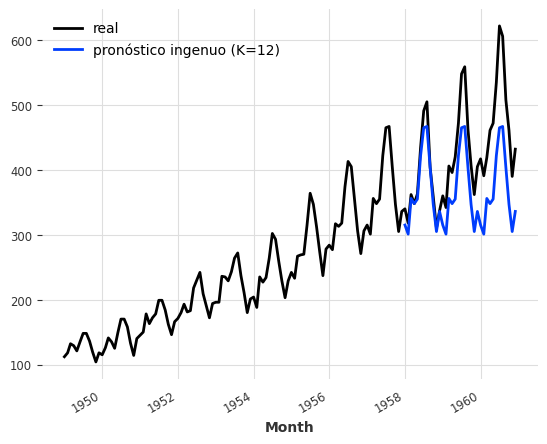

In [17]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="real")
seasonal_forecast.plot(label="pronóstico ingenuo (K=12)")

Esto es mejor, pero aún nos falta la tendencia. Afortunadamente, también hay otro modelo de referencia ingenuo que captura la tendencia, que se llama `NaiveDrift`. Este modelo simplemente produce predicciones lineales, con una pendiente determinada por el primer y el último valor del conjunto de entrenamiento:

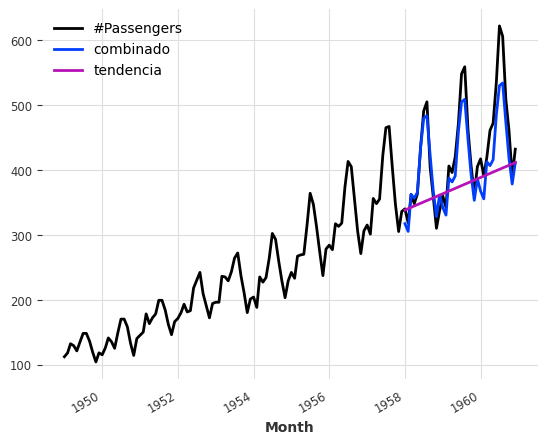

In [18]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combinado")
drift_forecast.plot(label="tendencia")

¿Que paso ahi? Simplemente ajustamos un modelo de tendencia ingenuo y agregamos su pronóstico al pronóstico estacional que teníamos anteriormente. También restamos el último valor del conjunto de entrenamiento del resultado, de modo que el pronóstico combinado resultante comience con la compensación correcta.

### <span style="color:#4CC9F0">Cálculo de métricas de error</span> 

Esto ya parece un pronóstico bastante decente, y todavía no usamos ningún modelo no ingenuo. De hecho, cualquier modelo debería poder superar esto.

Entonces, ¿cuál es el error que tendremos que vencer? Usaremos el [Error porcentual absoluto medio (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) (tenga en cuenta que en la práctica a menudo hay buenas razones para *no* usar el MAPE; lo usamos aquí ya que es bastante conveniente e independiente de la escala). En Darts es una llamada de función simple:

In [19]:
from darts.metrics import mape

print(
    'Error porcentual absoluto medio para la tendencia ingenua combinada + estacional: {:.2f}%.'.format(
        mape(series, combined_forecast)
    )
)

Error porcentual absoluto medio para la tendencia ingenua combinada + estacional: 5.66%.


`darts.metrics` contiene muchas más métricas para comparar series temporales. Las métricas compararán solo segmentos comunes de series cuando las dos series no estén alineadas y paralelizarán el cálculo en una gran cantidad de pares de series, pero no nos adelantemos.

### <span style="color:#4CC9F0">Pruebe rápidamente varios modelos</span>

Darts está diseñado para facilitar el entrenamiento y la validación de varios modelos de forma unificada. Entrenemos algunos más y calculemos su MAPE respectivo en el conjunto de validación. Antes describimos muy brevemente los modelo que probaremos.

#### <span style="color:#4CC9F0">Suavizamiento exponencial</span>

El suavizamiento exponencial es una técnica utilizada en el análisis de series de tiempo para predecir valores futuros o suavizar las fluctuaciones de una serie. Es un método de pronóstico que asigna pesos exponenciales decrecientes a los valores pasados de la serie, dando más importancia a los valores más recientes.

Existen diferentes variantes de suavizado exponencial, las más comunes son:

**Suavizado exponencial simple (SES)**: En este método, se calcula una media ponderada exponencialmente de los valores pasados de la serie. Cada observación recibe un peso que disminuye exponencialmente a medida que se retrocede en el tiempo. La fórmula general del suavizado exponencial simple es:

* $S_t = \alpha * Y_t + (1 - \alpha) * S_{t-1}$

Donde:

* $S_t$ es el valor suavizado en el período t.
* $Y_t$ es el valor observado en el período t.
* $S_{t-1}$ es el valor suavizado en el período anterior.
* $\alpha$ es el factor de suavizado, llamado coeficiente de suavizado, que determina el peso dado a los valores pasados. Debe estar en el rango [0, 1].

**Suavizado exponencial doble (Holt)**: Este método extiende el suavizado exponencial simple al considerar tanto la tendencia como el nivel en la serie de tiempo. Se utiliza cuando la serie de tiempo muestra una tendencia constante. La fórmula general del suavizado exponencial doble es:

* $N_t = \alpha * Y_t + (1 - \alpha) * (N_{t-1} + T_{t-1})$
* $T_t = \beta * (N_t - N_{t-1}) + (1 - \beta) * T_{t-1}$
* $S_t = N_t + T_t$

Donde:

* $N_t$ representa el nivel de la serie en el período $t$.
* $T_t$ representa la estimación de la tendencia en el período $t$.
* $Y_t$ es el valor observado en el período $t$.
* $\alpha$ y $\beta$ son coeficientes de suavizado para el nivel y la tendencia, respectivamente.

**Suavizado exponencial triple (Holt-Winters)**: Este método incorpora no solo la tendencia, sino también los componentes estacionales en la serie de tiempo. Es adecuado para series de tiempo que exhiben patrones estacionales repetitivos. Además de las ecuaciones del suavizado exponencial doble, se agregan componentes estacionales que se actualizan utilizando un factor de suavizado γ.

La variante aditiva de Holt-Winters se utiliza cuando las fluctuaciones estacionales son relativamente constantes a lo largo de la serie. La variante multiplicativa se utiliza cuando las fluctuaciones estacionales cambian proporcionalmente a los niveles de la serie.

El suavizado exponencial se basa en la idea de que los valores más recientes tienen más influencia en las predicciones futuras, y los valores más antiguos tienen menos peso. A través de diferentes variantes, el suavizado exponencial puede adaptarse a diferentes patrones de series de tiempo y proporcionar pronósticos más precisos.

#### <span style="color:#4CC9F0">TBATS</span>

TBATS (Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components) es un modelo estadístico utilizado para el análisis y pronóstico de series de tiempo que incorpora múltiples componentes, como la estacionalidad, la tendencia y los errores autorregresivos de media móvil (ARMA).

El modelo TBATS es una extensión del modelo de suavizado exponencial triple (Holt-Winters) que se adapta a las series de tiempo con patrones estacionales complejos y no lineales. Al incorporar componentes trigonométricas, como funciones seno y coseno, el modelo puede capturar estacionalidades con frecuencias múltiples y no necesariamente constantes.

Además de la estacionalidad, el modelo TBATS también puede manejar tendencias no lineales mediante la inclusión de términos polinómicos para modelar cambios en la pendiente o la curvatura de la serie de tiempo.

El modelo TBATS también incluye una transformación Box-Cox para manejar la variabilidad heterocedástica de la serie de tiempo y estabilizar la varianza.

En resumen, el modelo TBATS es un enfoque flexible y potente para el análisis y pronóstico de series de tiempo que combina diferentes componentes, como la estacionalidad, la tendencia, la transformación Box-Cox y los errores ARMA. Es especialmente útil para series de tiempo con patrones estacionales complejos y no lineales.

 #### <span style="color:#4CC9F0">Arima</span>

El modelo ARIMA (Autoregressive Integrated Moving Average) es un modelo estadístico utilizado para analizar y predecir series de tiempo. Combina componentes de autoregresión (AR), promedio móvil (MA) y diferenciación (I) para capturar tanto la dependencia en el tiempo como la estacionalidad presente en los datos.

Cada componente del modelo ARIMA tiene un propósito específico:

Componente de Autoregresión (AR): Representa la dependencia lineal de los valores pasados de la serie de tiempo. La idea detrás del AR es que el valor actual de la serie de tiempo puede explicarse mediante una combinación lineal de sus valores pasados. El orden del AR, denotado como p, indica cuántos valores pasados se utilizan en la predicción del valor actual.

Componente de Promedio Móvil (MA): Representa la dependencia lineal de los errores residuales pasados en la serie de tiempo. Los errores residuales son las diferencias entre los valores reales y los valores predichos por el modelo AR. El orden del MA, denotado como q, indica cuántos errores residuales pasados se tienen en cuenta para predecir el valor actual.

Componente de Diferenciación (I): Se utiliza para eliminar tendencias y estacionalidades presentes en la serie de tiempo. La diferenciación implica tomar la diferencia entre los valores observados en diferentes períodos. El orden de la diferenciación, denotado como d, indica el número de veces que se realiza esta operación para estabilizar la varianza y hacer que la serie de tiempo sea estacionaria.

La fórmula general de un modelo ARIMA $(p, d, q)$ se puede expresar de la siguiente manera:

$$\Delta^d Y(t) = c + \Sigma(\varphi_i * \Delta^d Y(t-i)) + \Sigma(\theta_j * \epsilon(t-j)) + \epsilon(t)$$

Donde:

* $\Delta^d Y(t)$ representa la serie de tiempo diferenciada d veces. Es decir, se aplica la diferenciación d veces para hacer que la serie sea estacionaria.
* $c$ es una constante que se agrega si la serie no es estacionaria en media.
* $\varphi_i$ son los coeficientes de autoregresión (AR) que representan la dependencia lineal de los valores pasados de la serie diferenciada.
* $\theta_j$ son los coeficientes de promedio móvil (MA) que representan la dependencia lineal de los errores residuales pasados.
* $\epsilon(t)$ es el término de error en el tiempo actual.

En esta fórmula, los coeficientes $\varphi_i$ y $\theta_j$ se estiman a partir de los datos de la serie de tiempo. Los valores de $p, d y q$ indican los órdenes correspondientes del modelo ARIMA. El valor de $p$ representa el orden del componente AR, el valor de $d$ indica el número de diferenciaciones realizadas y el valor de $q$ representa el orden del componente MA.

Es importante tener en cuenta que la forma exacta de la fórmula puede variar dependiendo de la implementación y las convenciones utilizadas en el software o el contexto específico del análisis de series de tiempo.


 #### <span style="color:#4CC9F0">AutoArima</span>

AUTOARIMA implementa un algoritmo automático para ajustar modelos ARIMA (AutoRegressive Integrated Moving Average) a series de tiempo. El método AUTOARIMA busca automáticamente el mejor modelo ARIMA para una serie de tiempo determinada, teniendo en cuenta los patrones y características de la serie.

El algoritmo de AUTOARIMA utiliza un enfoque heurístico para seleccionar los parámetros p, d y q del modelo ARIMA, que corresponden a los órdenes de autoregresión, la diferenciación y el promedio móvil, respectivamente. El enfoque se basa en una combinación de técnicas de búsqueda y criterios de selección de modelos, como el criterio de información de Akaike (AIC) o el criterio de información bayesiano (BIC).

La función AUTOARIMA examina diferentes combinaciones de órdenes p, d y q y evalúa la bondad de ajuste de los modelos correspondientes mediante los criterios de selección mencionados anteriormente. Luego, selecciona el modelo que minimiza el criterio elegido, lo que indica que es el modelo más adecuado para la serie de tiempo dada.

AUTOARIMA también puede tener en cuenta la estacionalidad en la serie de tiempo utilizando modelos SARIMA (Seasonal ARIMA), que incorporan componentes estacionales adicionales. El algoritmo puede buscar y seleccionar automáticamente los órdenes estacionales p, d, q y s.

En resumen, AUTOARIMA es un algoritmo proporciona una manera automatizada y conveniente de ajustar modelos ARIMA a series de tiempo, seleccionando automáticamente los órdenes óptimos del modelo basándose en criterios de selección. Esto facilita el proceso de modelado y pronóstico de series de tiempo para aquellos que no tienen experiencia en la selección manual de órdenes ARIMA.

 #### <span style="color:#4CC9F0">Theta</span>

El modelo $\text{Theta}(\theta)$ en el contexto de las series de tiempo se refiere a un modelo específico utilizado para el análisis y pronóstico de datos de series temporales. También se conoce como modelo de caminata aleatoria o modelo de primer orden autorregresivo.

El modelo Theta es relativamente simple y se basa en la premisa de que el valor futuro de la serie de tiempo es igual al valor actual más un componente de ruido aleatorio. En otras palabras, la serie de tiempo sigue una trayectoria similar a una caminata aleatoria.

La ecuación básica del modelo Theta se puede expresar de la siguiente manera:

* $Y(t+1) = Y(t) + \epsilon(t+1)$

Donde:

* $Y(t+1)$ es el valor de la serie de tiempo en el período t+1 (el período siguiente).
* $Y(t)$ es el valor de la serie de tiempo en el período t (el período actual).
* $\epsilon(t+1)$ es el componente de ruido aleatorio en el período t+1.
En este modelo, el valor futuro de la serie de tiempo se estima simplemente sumando un término de ruido aleatorio al valor actual. No hay consideración de patrones de tendencia, estacionalidad o autocorrelación en la serie.

El modelo Theta puede ser útil en situaciones donde la serie de tiempo no muestra patrones claros de tendencia o estacionalidad y se espera que los cambios futuros sean impulsados principalmente por el azar o factores aleatorios.

Es importante tener en cuenta que el modelo Theta puede ser demasiado simple para capturar patrones más complejos presentes en muchas series de tiempo. En tales casos, modelos más sofisticados como ARIMA (Autoregressive Integrated Moving Average) o modelos de suavizado exponencial pueden ser más apropiados.

El modelo Theta puede ser también paramétric y tiene la siguiente forma general dada por

 * $ Y(t+1) = \theta_0 + \theta_1 * Y(t) + \theta_2 * Y(t-1) + ... + \theta_p * Y(t-p) + \epsilon(t+1)$

Donde:

* $Y(t+1)$ es el valor de la serie de tiempo en el período $t+1$ (el período siguiente).
* $Y(t), Y(t-1), ..., Y(t-p)$ son los valores anteriores de la serie de tiempo utilizados para predecir el valor en el período $t+1$.
* $\theta_0, \theta_1, ..., \theta_p$ son los parámetros del modelo que se estiman a partir de los datos. Estos parámetros capturan la influencia de los valores pasados en la predicción del valor futuro.
* $\epsilon(t+1)$ es el término de error en el período $t+1$.
.
Al introducir los parámetros $\theta_0, \theta_1, ..., \theta_p$ en el modelo Theta, se permite una mayor flexibilidad para capturar diferentes patrones y tendencias en la serie de tiempo. Estos parámetros se estiman a través de métodos estadísticos, como la estimación de máxima verosimilitud, y su elección adecuada es fundamental para obtener pronósticos precisos.



Vamos con los códigos

In [20]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("El modelo {} obtiene MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

El modelo ExponentialSmoothing() obtiene MAPE: 5.11%
El modelo TBATS() obtiene MAPE: 5.87%
El modelo AutoARIMA() obtiene MAPE: 11.65%
El modelo Theta() obtiene MAPE: 8.15%


Aquí, solo construimos estos modelos con sus parámetros predeterminados. Probablemente podamos hacerlo mejor si nos ajustamos a nuestro problema. Probemos con el método Theta.

 #### <span style="color:#4CC9F0">Búsqueda de hiperparámetros con el método Theta</span> 

El modelo `Theta` contiene una implementación del método Theta de Assimakopoulos y Nikolopoulos. Este método ha tenido cierto éxito, particularmente en la competencia M3.

Aunque el valor del parámetro Theta a menudo se establece en 0 en las aplicaciones, la implementación `Darts` admite un valor variable para fines de ajuste de parámetros. Tratemos de encontrar un buen valor para Theta:

In [21]:
# Buscar el mejor parámetro theta probando 50 valores diferentes
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [22]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "El MAPE es: {:.2f}, con theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

El MAPE es: 4.40, con theta = -3.5102040816326543.


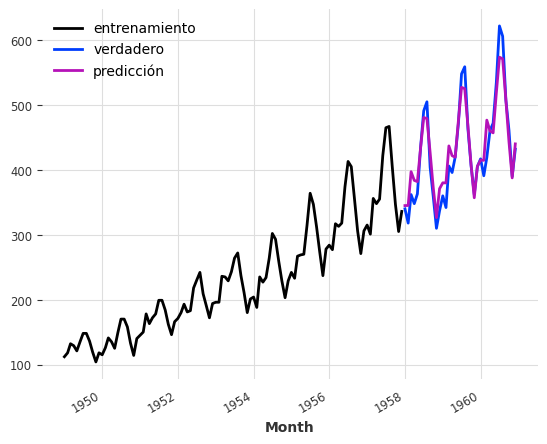

In [23]:
train.plot(label="entrenamiento")
val.plot(label="verdadero")
pred_best_theta.plot(label="predicción")

We can observe that the model with `best_theta` is so far the best we have, in terms of MAPE.

## <span style="color:blue">Backtesting: simulación de pronósticos históricos</span>

Entonces, en este punto, tenemos un modelo que funciona bien en nuestro conjunto de validación, y eso es bueno. Pero, ¿cómo podemos saber el rendimiento que *habríamos obtenido* si *hubiéramos estado usando este modelo* históricamente?

El backtesting simula predicciones que históricamente se habrían obtenido con un modelo dado. La producción puede tardar un tiempo, ya que el modelo se vuelve a entrenar (de forma predeterminada) cada vez que avanza el tiempo de predicción simulado.

Dichos pronósticos simulados siempre se definen con respecto a un *horizonte de pronóstico*, que es el número de pasos de tiempo que separan el tiempo de predicción del tiempo de pronóstico. En el siguiente ejemplo, simulamos pronósticos hechos para 3 meses en el futuro (en comparación con el tiempo de predicción). El resultado de llamar a `historical_forecasts()` es (por defecto) una `TimeSeries` que contiene esos pronósticos de 3 meses por delante:

In [24]:
historical_fcast_theta = best_theta_model.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 7.70%


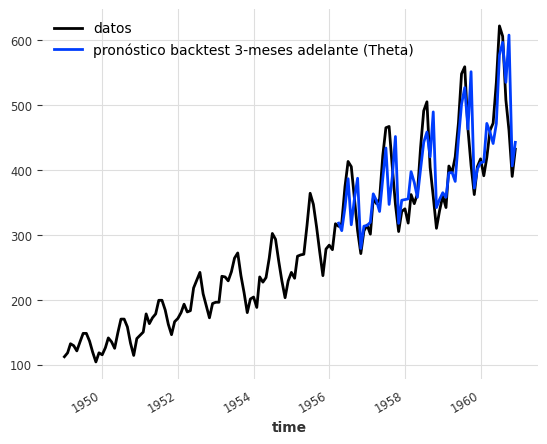

In [25]:
series.plot(label="datos")
historical_fcast_theta.plot(label="pronóstico backtest 3-meses adelante (Theta)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_theta, series)))

Entonces, parece que nuestro mejor modelo en el conjunto de validación ya no funciona tan bien cuando lo probamos (¿escuché sobreajuste: D?)

Para observar más de cerca los errores, también podemos usar el método `backtest()` para obtener todos los errores sin procesar (digamos, errores MAPE) que habría obtenido nuestro modelo:

  0%|          | 0/57 [00:00<?, ?it/s]

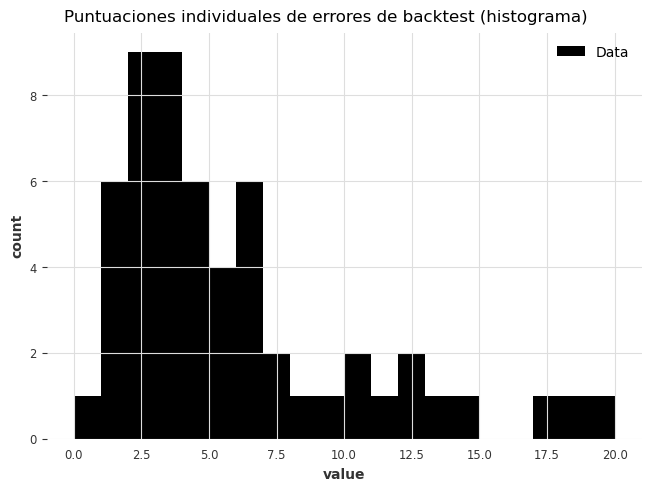

In [26]:
best_theta_model = Theta(best_theta)

raw_errors = best_theta_model.backtest(
    series, start=0.6, forecast_horizon=3, metric=mape, reduction=None, verbose=True
)

from darts.utils.statistics import plot_hist

plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title="Puntuaciones individuales de errores de backtest (histograma)",
)

Finalmente, usando `backtest()` también podemos obtener una vista más simple del error promedio sobre los pronósticos históricos:

In [27]:
average_error = best_theta_model.backtest(
    series,
    start=0.6,
    forecast_horizon=3,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Error promedio (MAPE) sobre todos los pronósticos históricos: %.2f" % average_error)

  0%|          | 0/57 [00:00<?, ?it/s]

Error promedio (MAPE) sobre todos los pronósticos históricos: 6.36


We could also for instance have specified the argument `reduction=np.median` to get the median MAPE instead.

### <span style="color:#4CC9F0">Una mirada a los residuos</span> 

Veamos los valores residuales ajustados de nuestro modelo Theta actual, es decir, la diferencia entre los pronósticos de 1 paso en cada punto en el tiempo obtenidos ajustando el modelo en todos los puntos anteriores y los valores reales observados:

`start` time `1949-04-01 00:00:00` is before the first predictable/trainable historical forecasting point for series at index: 0. Ignoring `start` for this series and beginning at first trainable/predictable time: 1949-05-01 00:00:00. To hide these warnings, set `show_warnings=False`.


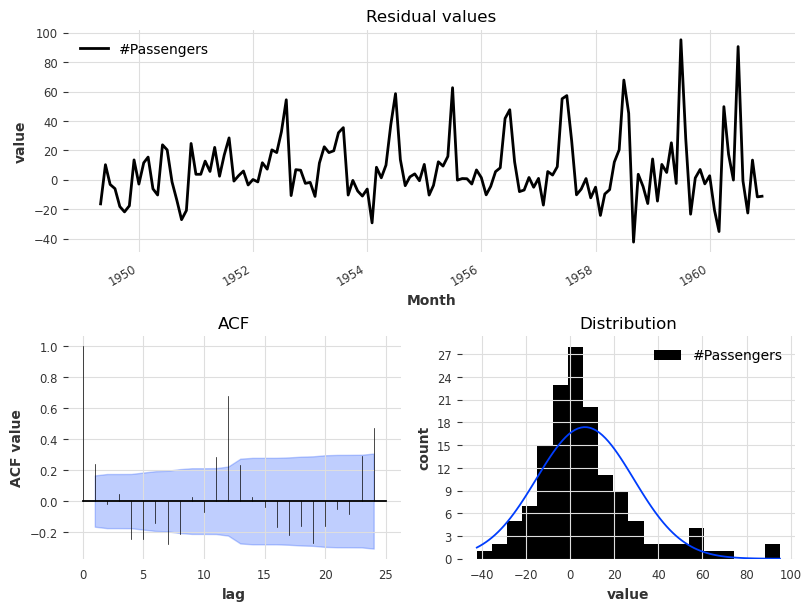

In [28]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(best_theta_model.residuals(series))

Podemos ver que la distribución no está centrada en 0, lo que significa que nuestro modelo `Theta` está sesgado. También podemos distinguir un valor ACF grande con un desfase igual a 12, lo que indica que los residuos contienen información que no fue utilizada por el modelo.

#### <span style="color:#4CC9F0">Un mejor modelo</span> 

¿Podríamos tal vez hacerlo mejor con un simple modelo `ExponentialSmoothing`?

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 4.45%


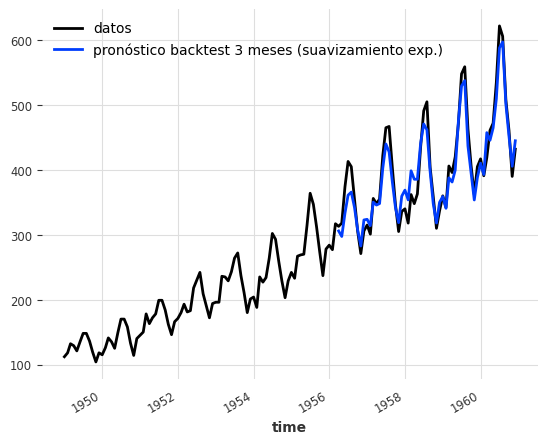

In [29]:
model_es = ExponentialSmoothing(seasonal_periods=12)
historical_fcast_es = model_es.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

series.plot(label="datos")
historical_fcast_es.plot(label="pronóstico backtest 3 meses (suavizamiento exp.)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_es, series)))

¡Así mucho mejor! En este caso, obtenemos un error porcentual absoluto medio de alrededor del 4-5% cuando realizamos una prueba retrospectiva con un horizonte de pronóstico de 3 meses.

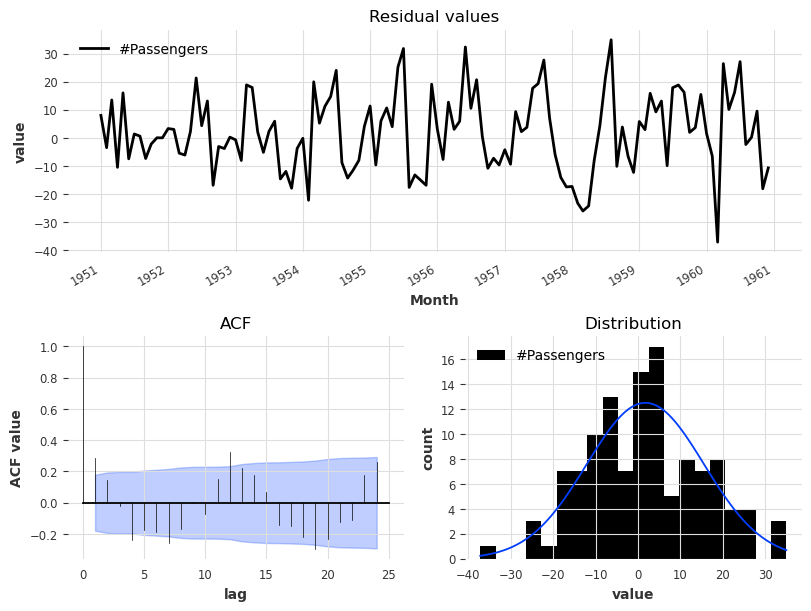

In [30]:
plot_residuals_analysis(model_es.residuals(series))

El análisis de residuales también refleja un mejor desempeño en el sentido de que ahora tenemos una distribución de los residuales centrada en el valor 0, y los valores de ACF, aunque no son insignificantes, tienen magnitudes más bajas.

## <span style="color:blue">Aprendizaje automático y modelos globales</span>

`Darts` tiene un rico soporte para modelos de pronóstico de aprendizaje automático y aprendizaje profundo; por ejemplo:

* [RegressionModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.regression_model.html) puede envolver cualquier modelo de regresión compatible con sklearn para producir pronósticos (tiene su propia [sección abajo](#Modelos-de-pronóstico-de-regresión)).
* [RNNModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.rnn_model.html) es una implementación RNN flexible, que se puede utilizar como DeepAR.
* [NBEATSModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nbeats.html) implementa el modelo N-BEATS.
* [TFTModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.tft_model.html) implementa eñ modelo Temporal Fusion Transformer model.
* [TCNModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.tcn_model.html) implementa el modelo temporal convolutional networks.
* ...

Además de admitir la misma interfaz básica `fit()`/`predict()` que los otros modelos, estos modelos también son *modelos globales*, ya que admiten el entrenamiento en varias series temporales (a veces denominados *metaaprendizaje). *).

Este es un punto clave del uso de modelos basados ​​en ML para la previsión: la mayoría de las veces, los modelos de ML (especialmente los modelos de aprendizaje profundo) deben entrenarse con grandes cantidades de datos, lo que a menudo significa una gran cantidad de series temporales separadas pero relacionadas.

En `Darts`, la forma básica de especificar múltiples 'TimeSeries' es usando una 'Secuencia' de 'TimeSeries' (por ejemplo, una lista simple de 'TimeSeries').

### <span style="color:#4CC9F0">Un ejemplo de juguete con dos series</span> 

Estos modelos se pueden entrenar en miles de series. Aquí, por el bien de la ilustración, cargaremos dos series distintas: el conteo de pasajeros del tráfico aéreo y otra serie que contiene la cantidad de libras de leche producidas por vaca mensualmente. También colocamos nuestra serie en formato `np.float32` ya que eso acelerará ligeramente el entrenamiento:

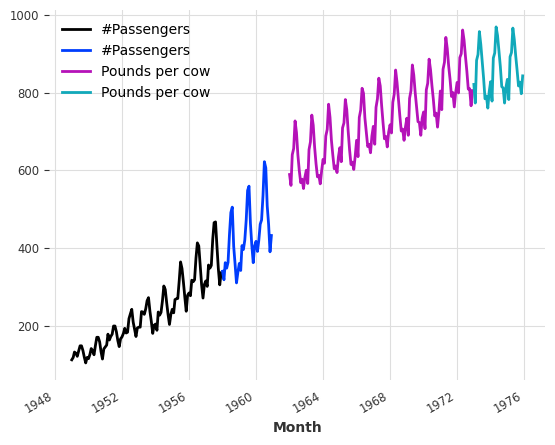

In [31]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

series_air = AirPassengersDataset().load().astype(np.float32)
series_milk = MonthlyMilkDataset().load().astype(np.float32)

# reservar los últimos 36 meses de cada serie como conjunto de validación:
train_air, val_air = series_air[:-36], series_air[-36:]
train_milk, val_milk = series_milk[:-36], series_milk[-36:]

train_air.plot()
val_air.plot()
train_milk.plot()
val_milk.plot()

Primero, escalemos estas dos series entre 0 y 1, ya que eso beneficiará a la mayoría de los modelos de ML. Usaremos un [Scaler](https://unit8co.github.io/darts/generated_api/darts.dataprocessing.transformers.scaler.html) for this:

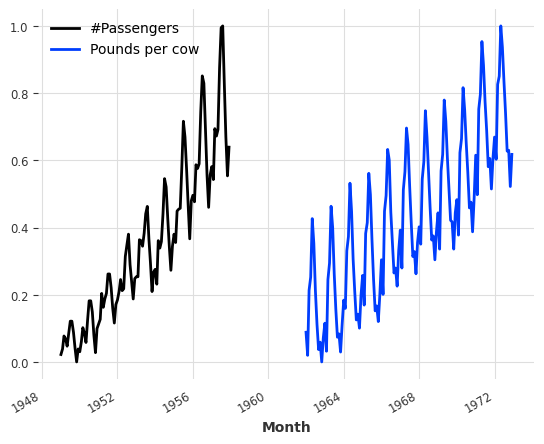

In [32]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_air_scaled, train_milk_scaled = scaler.fit_transform([train_air, train_milk])

train_air_scaled.plot()
train_milk_scaled.plot()

Observe cómo podemos escalar varias series de una sola vez. También podemos paralelizar este tipo de operaciones en múltiples procesadores especificandog `n_jobs`.

### <span style="color:#4CC9F0"> Uso del aprendizaje profundo: ejemplo con N-BEATS</span>

`N-BEATS` (Neural basis expansion analysis for interpretable time series forecasting) es un modelo de redes neuronales desarrollado para el análisis y pronóstico de series de tiempo. A diferencia de los enfoques tradicionales basados en ARIMA o modelos de suavizado exponencial, N-BEATS utiliza redes neuronales profundas para capturar patrones complejos y no lineales en los datos de la serie de tiempo. Para los detalles consulte el artículo [N-BEATS: NEURAL BASIS EXPANSION ANALYSIS FOR INTERPRETABLE TIME SERIES FORECASTING](https://arxiv.org/pdf/1905.10437.pdf).


El modelo N-BEATS está diseñado para ser interpretable y flexible en términos de la duración de las series de tiempo y las frecuencias de muestreo. Utiliza una arquitectura basada en bloques de transformadores (transformer blocks) que permiten capturar dependencias de largo alcance en los datos.

El concepto central del modelo N-BEATS es la expansión de base neuronal (neural basis expansion), que implica descomponer una serie de tiempo en una combinación de funciones de base que se aprenden durante el entrenamiento del modelo. Estas funciones de base capturan patrones y tendencias subyacentes en la serie de tiempo, lo que permite que el modelo realice pronósticos precisos.

La arquitectura de N-BEATS se compone de bloques de expansión (stacked fully connected layers) seguidos de bloques de pestañas (stacked gated linear units). Los bloques de expansión generan funciones de base y los bloques de pestañas combinan y ponderan estas funciones para generar las predicciones finales.

Una ventaja clave de N-BEATS es su interpretabilidad, ya que puede descomponer la serie de tiempo en funciones de base que se pueden analizar e interpretar individualmente. Esto proporciona información valiosa sobre los patrones y tendencias presentes en los datos.

En resumen, N-BEATS es un modelo de redes neuronales diseñado para el análisis y pronóstico de series de tiempo. Utiliza bloques de transformadores y la expansión de base neuronal para capturar patrones complejos en los datos. Su enfoque interpretable lo distingue de otros modelos de series de tiempo basados en redes neuronales.


A continuación, crearemos un [modelo N-BEATS](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nbeats.html). Este modelo se puede ajustar con muchos hiperparámetros (como el número de pilas, capas, etc.). Aquí, por simplicidad, lo usaremos con hiperparámetros predeterminados. Los únicos dos hiperparámetros que tenemos que proporcionar son:

* `input_chunk_length`: esta es la "ventana retrospectiva" del modelo, es decir, cuántos pasos de tiempo de la historia toma la red neuronal como entrada para producir su salida en un paso hacia adelante.
* `output_chunk_length`: esta es la "ventana de avance" del modelo, es decir, cuántos pasos de tiempo de valores futuros genera la red neuronal en un paso de avance.

El parámetro `random_state` solo está aquí para obtener resultados reproducibles.

La mayoría de las redes neuronales en `Darts` requieren estos dos parámetros. Aquí, usaremos múltiplos de la estacionalidad. Ahora estamos listos para ajustar nuestro modelo en nuestras dos series (dando una lista que contiene las dos series para `fit()`):

In [33]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit([train_air_scaled, train_milk_scaled], epochs=50, verbose=True);

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


Veamos ahora algunos pronósticos a 36 meses para nuestras dos series. Podemos simplemente usar el argumento `series` de la función `fit()` para decirle al modelo qué serie pronosticar. Es importante destacar que `output_chunk_length` no restringe directamente el horizonte de pronóstico `n` que se puede usar con `predict()`. Aquí, entrenamos el modelo con `output_chunk_length=12` y generamos pronósticos para `n=36` meses; esto simplemente se hace de forma autorregresiva detrás de escena (donde la red consume recursivamente sus salidas anteriores).

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

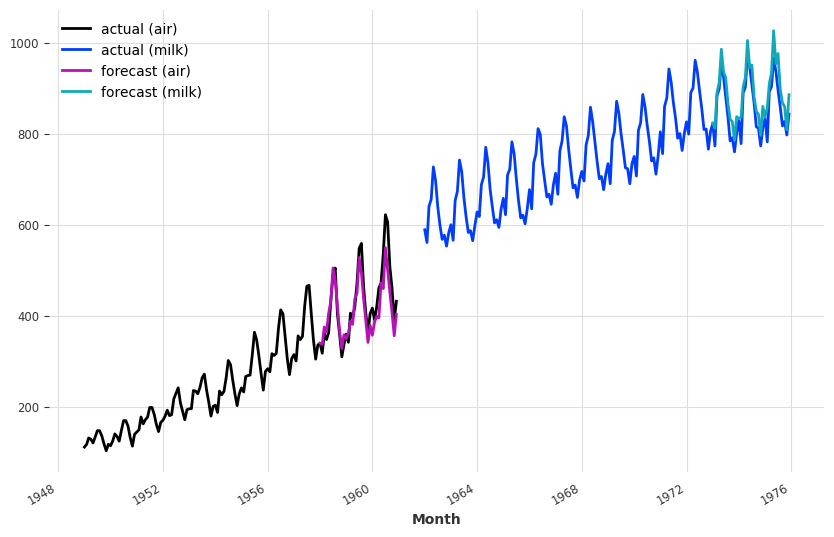

In [34]:
pred_air = model.predict(series=train_air_scaled, n=36)
pred_milk = model.predict(series=train_milk_scaled, n=36)

# scale back:
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize=(10, 6))
series_air.plot(label="actual (air)")
series_milk.plot(label="actual (milk)")
pred_air.plot(label="forecast (air)")
pred_milk.plot(label="forecast (milk)")

¡Nuestros pronósticos en realidad no son tan terribles, considerando que usamos **un modelo** con hiperparámetros predeterminados para capturar tanto a los pasajeros aéreos como a la producción de leche!

El modelo parece bastante bueno para capturar la estacionalidad anual, pero pierde la tendencia de la serie aérea. En la siguiente sección, intentaremos resolver este problema utilizando datos externos (covariables).

## <span style="color:blue">Covariables: usando datos externos</span> 

Además de la serie **objetivo** (la serie que nos interesa pronosticar), muchos modelos en Darts también aceptan series de **covariables** en la entrada. Las covariables son series que no queremos pronosticar, pero que pueden proporcionar información adicional útil a los modelos. Tanto los objetivos como las covariables pueden ser multivariantes o univariantes.

Hay dos tipos de series temporales de covariables en Darts:

* `past_covariates` son series que no necesariamente se conocen antes del tiempo de pronóstico. Esos pueden, por ejemplo, representar cosas que deben medirse y no se conocen por adelantado. Los modelos no usan los valores futuros de `past_covariates` cuando hacen pronósticos.
* `future_covariates` son series que se conocen de antemano, hasta el horizonte de pronóstico. Esto puede representar cosas como información de calendario, días festivos, pronósticos del tiempo, etc. Los modelos que aceptan `future_covariates` observarán los valores futuros (hasta el horizonte de pronóstico) al hacer pronósticos.


<figure>
<center>
<img src="../Imagenes/covariates-highlevel.png" width="600" height="400" align="center" /> 
</center>   
</figure>

Fuente : [Darts](https://github.com/unit8co/darts)

Cada covariable puede ser potencialmente multivariante. Si tiene varias series de covariables (como valores de mes y año), debe 'apilar' *stack()* o 'concatenar' *concatenate()* para obtener una serie multivariante.

Las covariables que proporcione pueden ser más largas de lo necesario. Darts intentará ser inteligente y cortarlos de la manera correcta para pronosticar el objetivo, en función de los índices de tiempo de las diferentes series. Sin embargo, recibirá un error si sus covariables no tienen un período de tiempo suficiente.

Ahora construyamos algunas covariables externas que contengan valores mensuales y anuales para nuestra serie de aire y leche.
En la celda de abajo, usamos la función `darts.utils.timeseries_generation.datetime_attribute_timeseries()` para generar series que contienen los valores de mes y año, y `concatenamos` estas series a lo largo del eje `"componente"` para obtener una serie de covariables con dos componentes (mes y año), por serie objetivo. Para simplificar, escalamos directamente los valores de mes y año para tenerlos entre (aproximadamente) 0 y 1:

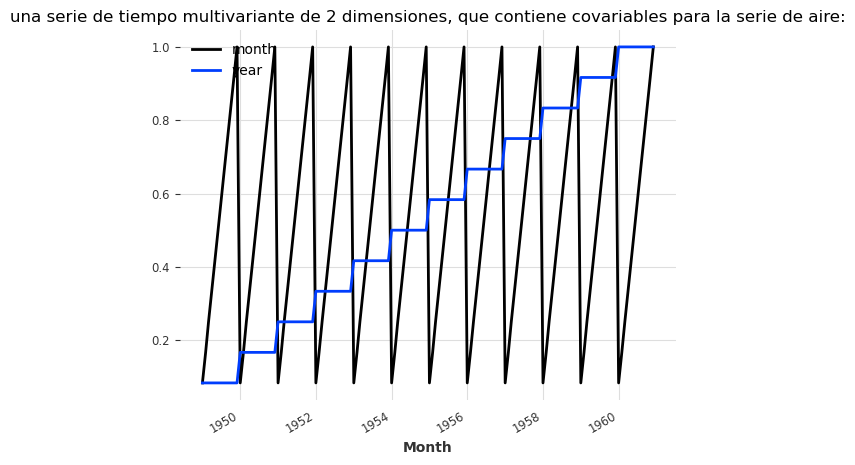

In [38]:
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr

air_covs = concatenate(
    [
        dt_attr(series_air.time_index, "month", dtype=np.float32) / 12,
        (dt_attr(series_air.time_index, "year", dtype=np.float32) - 1948) / 12,
    ],
    axis="component",
)

milk_covs = concatenate(
    [
        dt_attr(series_milk.time_index, "month", dtype=np.float32) / 12,
        (dt_attr(series_milk.time_index, "year", dtype=np.float32) - 1962) / 13,
    ],
    axis="component",
)

air_covs.plot()
plt.title(
    "Una serie de tiempo multivariante de 2 dimensiones, que contiene covariables para la serie de passengers:"
);

No todos los modelos admiten todos los tipos de covariables. `NBEATSModel` solo admite `past_covariates`. Por lo tanto, aunque nuestras covariables representen información de calendario y se conozcan de antemano, las usaremos como `covariables_pasadas` con N-BEATS. Para entrenar, todo lo que tenemos que hacer es darles como `past_covariates` a la función `fit()`, en el mismo orden que los objetivos:

In [39]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(
    [train_air_scaled, train_milk_scaled],
    past_covariates=[air_covs, milk_covs],
    epochs=50,
    verbose=True,
);

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
26.314    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


Luego, para producir pronósticos, nuevamente tenemos que proporcionar nuestras covariables como `covariables_pasadas` a la función `predict()`. Aunque la serie de tiempo de las covariables también contiene valores "futuros" de las covariables hasta el horizonte de pronóstico, el modelo *no* consumirá esos valores futuros, porque los usa como covariables pasadas (y no covariables futuras).

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

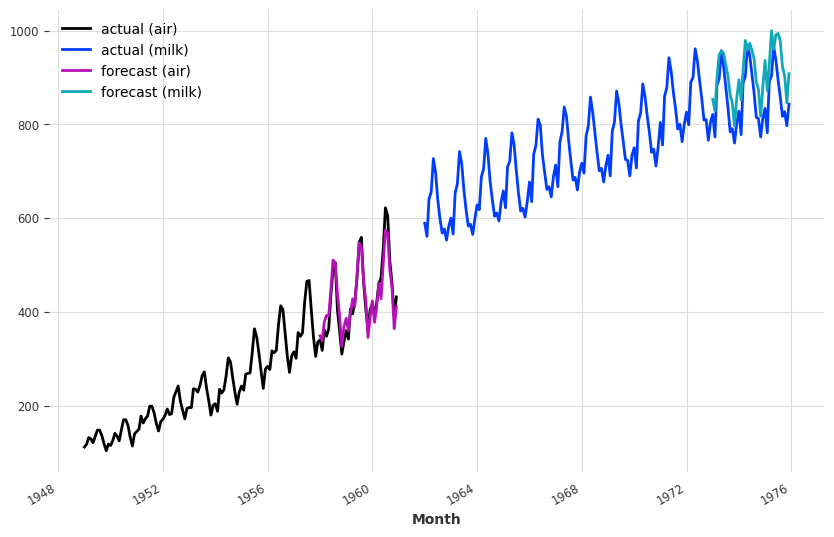

In [40]:
pred_air = model.predict(series=train_air_scaled, past_covariates=air_covs, n=36)
pred_milk = model.predict(series=train_milk_scaled, past_covariates=milk_covs, n=36)

# regresa a la escala original
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize=(10, 6))
series_air.plot(label="actual (air)")
series_milk.plot(label="actual (milk)")
pred_air.plot(label="forecast (air)")
pred_milk.plot(label="forecast (milk)")

Parece que ahora el modelo captura mejor la tendencia de la serie del aire (que también perturba un poco los pronósticos de la serie de la leche).

### <span style="color:#4CC9F0">Codificadores: uso de covariables gratis</span>

El uso de covariables relacionadas con el calendario o el eje del tiempo (como meses y años como en nuestro ejemplo anterior) es tan frecuente que los modelos de aprendizaje profundo en Darts tienen una funcionalidad integrada para usar tales covariables listas para usar.

Para integrar fácilmente tales covariables a su modelo, simplemente puede especificar el parámetro `add_encoders` en la creación del modelo. Este parámetro debe ser un diccionario que contenga información sobre lo que debe codificarse como covariables adicionales. Aquí hay un ejemplo de cómo podría verse un diccionario de este tipo, para un modelo que admita covariables pasadas y futuras:

In [41]:
encoders = {
    "cyclic": {"future": ["month"]},
    "datetime_attribute": {"future": ["hour", "dayofweek"]},
    "position": {"past": ["absolute"], "future": ["relative"]},
    "custom": {"past": [lambda idx: (idx.year - 1950) / 50]},
    "transformer": Scaler(),
}

En el diccionario anterior, se especifican las siguientes cosas:

* El mes debe usarse como una covariable futura, con una codificación cíclica (sin/cos).
* La hora y el día de la semana deben usarse como futuras covariables.
* La posición absoluta (paso de tiempo en la serie) debe usarse como covariable pasada.
* La posición relativa (w.r.t el tiempo de pronóstico) debe usarse como covariable futura.
* Se debe usar una función personalizada adicional del año como covariable anterior.
* Todas las covariables anteriores deben escalarse usando un `Scaler`, que se ajustará al llamar a la función `fit()` del modelo y se usará después para transformar las covariables.

Lo remitimos a la documentación de  la [API](https://unit8co.github.io/darts/generated_api/darts.utils.data.encoders.html#darts.utils.data.encoders.SequentialEncoder) para obtener más información sobre cómo usar codificadores.

Para replicar nuestro ejemplo con el mes y el año usados ​​como covariables anteriores con N-BEATS, podemos usar algunos codificadores de la siguiente manera:

In [42]:
encoders = {"datetime_attribute": {"past": ["month", "year"]}, "transformer": Scaler()}

Ahora, todo el entrenamiento del modelo N-BEATS con estas covariables tiene el siguiente aspecto:

In [43]:
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    add_encoders=encoders,
    random_state=42,
)

model.fit([train_air_scaled, train_milk_scaled], epochs=50, verbose=True);

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
26.314    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


Y obtenga algunos pronósticos para la serie de pasajeros aéreos:

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

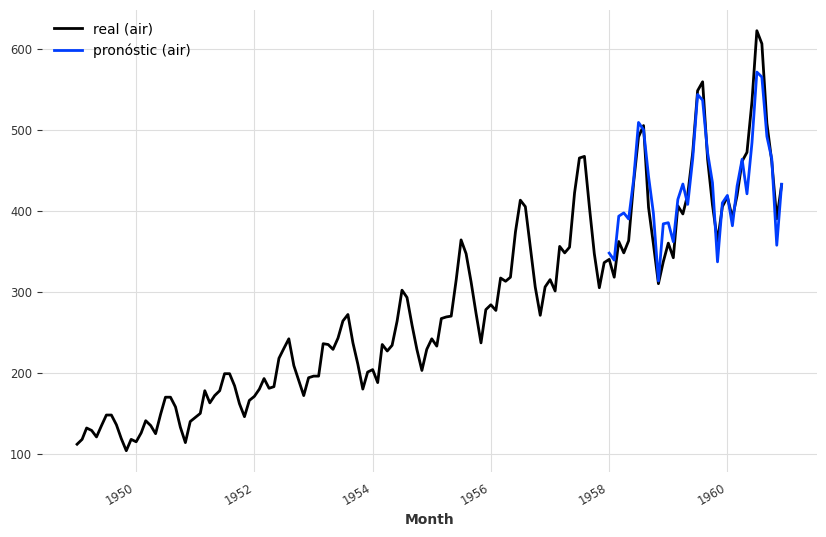

In [44]:
pred_air = model.predict(series=train_air_scaled, n=36)

# scale back:
pred_air = scaler.inverse_transform(pred_air)

plt.figure(figsize=(10, 6))
series_air.plot(label="real (air)")
pred_air.plot(label="pronóstic (air)")

### <span style="color:#4CC9F0">Modelos de pronóstico de regresión</span> 

[RegressionModel's](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.regression_model.html) son modelos de pronóstico que envuelven modelos de regresión compatibles con sklearn. El modelo de regresión interna se utiliza para predecir valores futuros de la serie objetivo, en función de ciertos retrasos de las covariables objetivo, pasadas y futuras. Detrás de escena, las series de tiempo se tabularizan para construir un conjunto de datos de entrenamiento en el formato correcto. La imagen muestra como se tabulan los datos para implementar un modelo de pronóstico por regresión para el caso univariado.

<figure>
<center>
<img src="../Imagenes/prediccion_tres_dias.jpg" width="1000" height="1000" align="center" /> 
</center>   
</figure>

Fuente : Alvaro Montenegro

Y la siguiente imagen ilustra como se preparan los datos para los pronósticos multivariados. Darts, hace todo el trabajo por nosotros.


<figure>
<center>
<img src="../Imagenes/Serie_Multivariada.jpg" width="1000" height="1000" align="center" /> 
</center>   
</figure>

Fuente : Alvaro Montenegro

Por defecto, `RegressionModel` hará una regresión lineal. Es muy fácil usar cualquier modelo de regresión compatible con sklearn deseado especificando el parámetro 'modelo', pero para mayor comodidad, Darts también proporciona un par de modelos listos para usar:

* [RandomForest](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.random_forest.html) envoltura  de`sklearn.ensemble.RandomForestRegressor`.
* [LightGBMModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.lgbm.html)envoltura de  `lightbm`.
* [LinearRegressionModel](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.linear_regression_model.html) envoltura de `sklearn.linear_model.LinearRegression` acepta los mismos kwargs).

Por ejemplo, así es como se ve el ajuste de una regresión rígido bayesiana a nuestro problema de dos series de juguetes:

In [45]:
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge

model = RegressionModel(lags=72, lags_future_covariates=[-6, 0], model=BayesianRidge())

model.fit(
    [train_air_scaled, train_milk_scaled], future_covariates=[air_covs, milk_covs]
);

Arriba pasaron varias cosas:

* `lags=72` le dice al `RegressionModel` que mire los últimos 72 retrasos del objetivo.
* Además, `lags_future_covariates=[-6, 0]` significa que el modelo también observará los retrasos de las `future_covariates` que proporcionamos. Aquí enumeramos los retrasos precisos que queremos que los modelos tengan en cuenta; los retrasos "-6th" y "0th". El retraso "0" significa el retraso "actual" (es decir, en el paso de tiempo que se pronostica); obviamente, conocer este retraso requiere conocer los datos de antemano (de ahí el hecho de que estemos usando `future_covariates`). De manera similar, `-6` significa que también observamos el valor de las covariables 6 meses antes del paso de tiempo pronosticado (que también requiere conocer las covariables por adelantado si estamos pronosticando en un horizonte de más de 6 pasos adelante).
* `model=BayesianRidge()` proporciona el modelo de regresión interno real.

Ahora vamos a obtener algunos pronósticos:

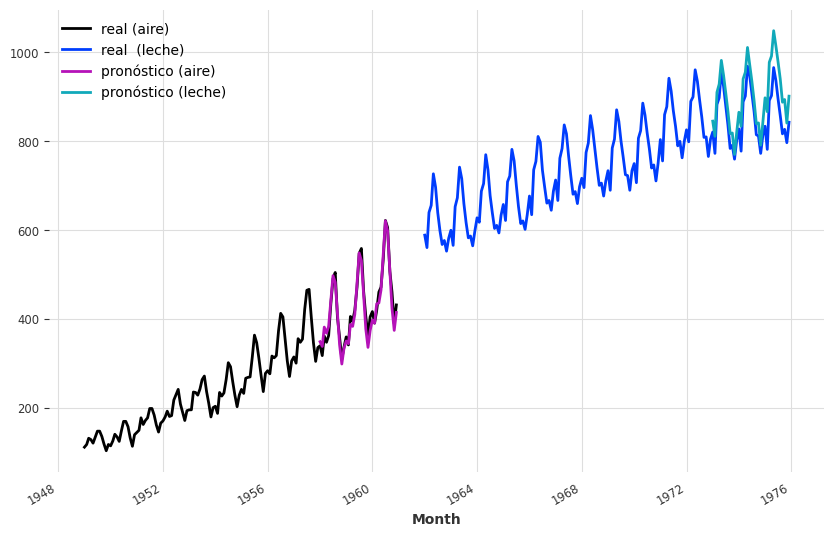

In [46]:
pred_air, pred_milk = model.predict(
    series=[train_air_scaled, train_milk_scaled],
    future_covariates=[air_covs, milk_covs],
    n=36,
)

# scale back:
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize=(10, 6))
series_air.plot(label="real (aire)")
series_milk.plot(label="real  (leche)")
pred_air.plot(label="pronóstico (aire)")
pred_milk.plot(label="pronóstico (leche)")

Observe cómo obtuvimos los pronósticos para las dos series de tiempo a la vez arriba. Del mismo modo, también podemos obtener algunas métricas sobre secuencias de series:

In [47]:
mape([series_air, series_milk], [pred_air, pred_milk])

[3.417011722922325, 5.283196270465851]

o la métrica promedio sobre "todas" las series:

In [48]:
mape([series_air, series_milk], [pred_air, pred_milk], inter_reduction=np.mean)

4.350103996694088

Por cierto: de manera similar a los transformadores como `Scaler`, las métricas informativas se pueden paralelizar en `N` procesadores  cuando se ejecutan en muchos pares de series especificando `n_jobs=N`.

Parece que este modelo funciona bien en la serie de tráfico aéreo, ¿cómo funciona cuando lo probamos en esta serie?

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 3.66


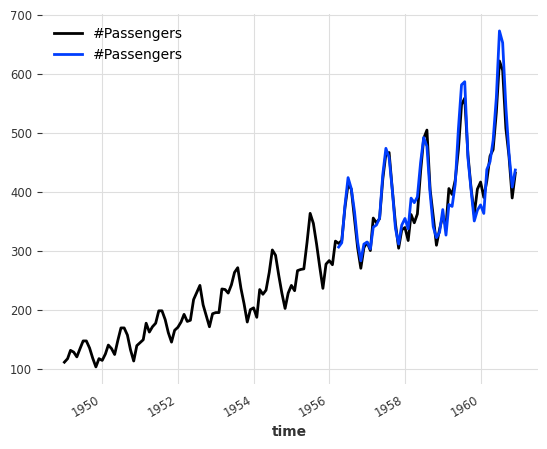

In [49]:
bayes_ridge_model = RegressionModel(
    lags=72, lags_future_covariates=[0], model=BayesianRidge()
)

backtest = bayes_ridge_model.historical_forecasts(
    series_air, future_covariates=air_covs, start=0.6, forecast_horizon=3, verbose=True
)

print("MAPE = %.2f" % (mape(backtest, series_air)))
series_air.plot()
backtest.plot()

¡Nuestro mejor modelo hasta ahora!

## <span style="color:blue">Pronósticos probabilísticos</span> 

Algunos modelos pueden producir pronósticos probabilísticos. Este es el caso de todos los modelos de aprendizaje profundo (como `RNNModel`, `NBEATSModel`, etc...), así como `ARIMA` y `ExponentialSmoothing`. La lista completa está [disponible en la página README de Darts](https://github.com/unit8co/darts#forecasting-models).

Para `ARIMA` y `ExponentialSmoothing`, uno puede simplemente especificar un parámetro `num_samples` a la función `predict()`. La 'TimeSeries' devuelta estará compuesta por muestras de Monte Carlo 'num_samples' que describen la distribución de los valores de la serie temporal. La ventaja de confiar en las muestras de Monte Carlo (en contraste con, por ejemplo, los intervalos de confianza explícitos) es que se pueden usar para describir cualquier distribución conjunta paramétrica o no paramétrica sobre los componentes y calcular cuantiles arbitrarios.

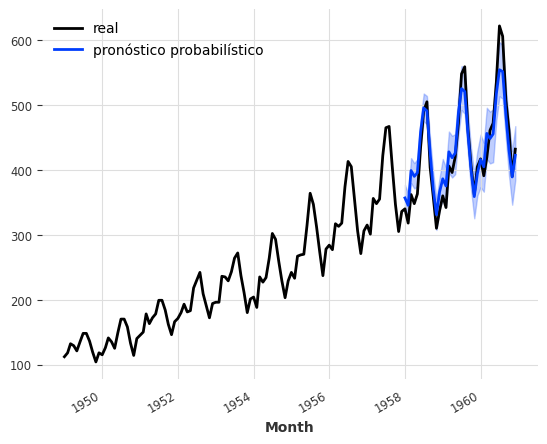

In [50]:
model_es = ExponentialSmoothing()
model_es.fit(train)
probabilistic_forecast = model_es.predict(len(val), num_samples=500)

series.plot(label="real")
probabilistic_forecast.plot(label="pronóstico probabilístico")
plt.legend()
plt.show()

### <span style="color:#4CC9F0"> Con redes neuronales</span>

Con las redes neuronales, uno tiene que dar un objeto de "Verosimilitud" al modelo. Las probabilidades especifican a qué distribución intentará ajustarse el modelo, junto con posibles valores previos para los parámetros de las distribuciones. La lista completa de probabilidades disponibles está [disponible en los documentos](https://unit8co.github.io/darts/generated_api/darts.utils.likelihood_models.html).

Usar probabilidades es fácil. Por ejemplo, así es como se ve el entrenamiento de un 'NBEATSModel' para que se ajuste a una probabilidad de Laplace:

In [51]:
from darts.models import TCNModel
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(),
)

model.fit(train_air_scaled, epochs=400, verbose=True);

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 166   
----------------------------------------------------
166       Trainable params
0         Non-trainable params
166       Total params
0.001     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


Luego, para obtener pronósticos probabilísticos, nuevamente solo necesitamos especificar algunos `num_samples >> 1`:

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

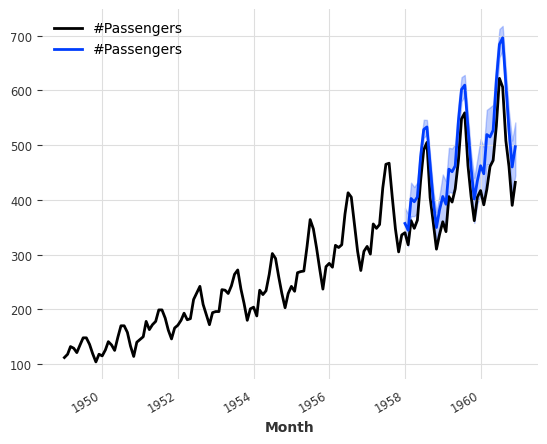

In [52]:
pred = model.predict(n=36, num_samples=500)

# regresa a la escala original
pred = scaler.inverse_transform(pred)

series_air.plot()
pred.plot()

Además, también podríamos, por ejemplo, especificar que tenemos alguna creencia previa de que la escala de la distribución es de alrededor de $0.1$ (en el dominio transformado), al mismo tiempo que capturamos alguna dependencia temporal de la distribución, especificando `prior_b=.1`.

Detrás de escena, esto regularizará la pérdida de entrenamiento con un término de divergencia Kullback-Leibler.

In [53]:
model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(prior_b=0.1),
)

model.fit(train_air_scaled, epochs=400, verbose=True);

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 166   
----------------------------------------------------
166       Trainable params
0         Non-trainable params
166       Total params
0.001     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

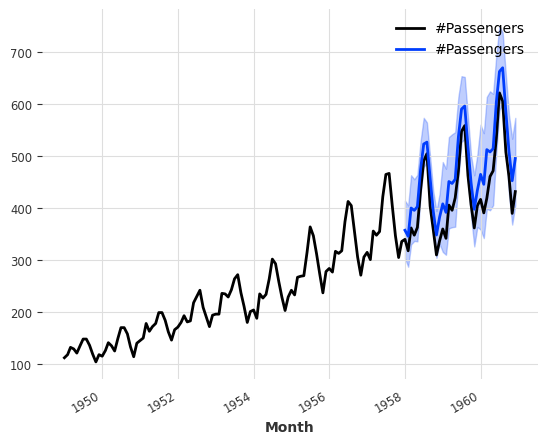

In [54]:
pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series_air.plot()
pred.plot()

Por defecto, `TimeSeries.plot()` muestra la mediana, así como los percentiles 5 y 95 (de las distribuciones marginales, si `TimeSeries` es multivariante). Es posible controlar esto:

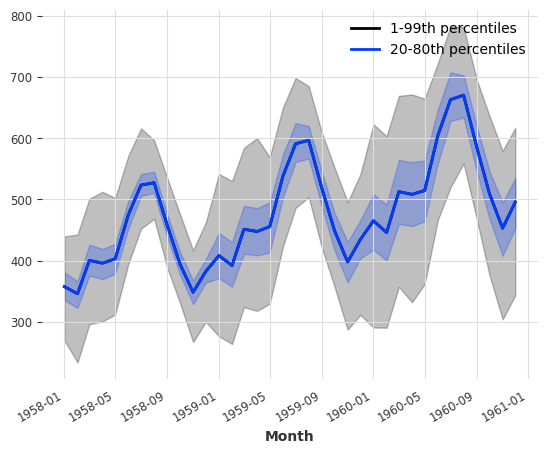

In [55]:
pred.plot(low_quantile=0.01, high_quantile=0.99, label="1-99th percentiles")
pred.plot(low_quantile=0.2, high_quantile=0.8, label="20-80th percentiles")

#### <span style="color:#4CC9F0"> Tipos de distribuciones</span>

La probabilidad tiene que ser compatible con el dominio de los valores de su serie temporal. Por ejemplo 

* [PoissonLikelihood](https://unit8co.github.io/darts/generated_api/darts.utils.likelihood_models.html#darts.utils.likelihood_models.PoissonLikelihood) se puede utilizar en valores positivos discretos, 
* [ExponentialLikelihood](https://unit8co.github.io/darts/generated_api/darts.utils.likelihood_models.html#darts.utils.likelihood_models.ExponentialLikelihood) se puede utilizar en valores reales positivos, y 
* [BetaLikelihood](https://unit8co.github.io/darts/generated_api/darts.utils.likelihood_models.html#darts.utils.likelihood_models.BetaLikelihood) con valores reales en $(0,1)$.

También es posible utilizar 
* [QuantileRegression](https://unit8co.github.io/darts/generated_api/darts.utils.likelihood_models.html#darts.utils.likelihood_models.QuantileRegression)para aplicar una pérdida cuantil y ajustar algunos cuantiles deseados directamente.

#### <span style="color:#4CC9F0">Evaluación de pronósticos probabilísticos</span>

¿Cómo podemos evaluar la calidad de los pronósticos probabilísticos? De forma predeterminada, la mayoría de las funciones de métricas (como `mape()`) seguirán funcionando, pero solo observarán el pronóstico medio. También es posible utilizar la métrica de riesgo $\rho$ (o pérdida cuantil), que cuantifica el error para cada cuantil previsto:

In [56]:
from darts.metrics import rho_risk

print("MAPE of median forecast: %.2f" % mape(series_air, pred))
for rho in [0.05, 0.1, 0.5, 0.9, 0.95]:
    rr = rho_risk(series_air, pred, rho=rho)
    print("rho-risk at quantile %.2f: %.2f" % (rho, rr))

MAPE of median forecast: 11.16
rho-risk at quantile 0.05: 0.13
rho-risk at quantile 0.10: 0.14
rho-risk at quantile 0.50: 0.11
rho-risk at quantile 0.90: 0.03
rho-risk at quantile 0.95: 0.02


#### <span style="color:#4CC9F0">Uso de la pérdida cuantil</span> 

¿Podríamos hacerlo mejor ajustando estos cuantiles directamente? Podemos simplemente usar una probabilidad `QuantileRegression`:

In [57]:
from darts.utils.likelihood_models import QuantileRegression

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=QuantileRegression([0.05, 0.1, 0.5, 0.9, 0.95]),
)

model.fit(train_air_scaled, epochs=400, verbose=True);

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 208   
----------------------------------------------------
208       Trainable params
0         Non-trainable params
208       Total params
0.001     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MAPE del pronóstico de la mediana: 7.78
rho-risk at quantile 0.05: 0.07
rho-risk at quantile 0.10: 0.08
rho-risk at quantile 0.50: 0.07
rho-risk at quantile 0.90: 0.02
rho-risk at quantile 0.95: 0.01


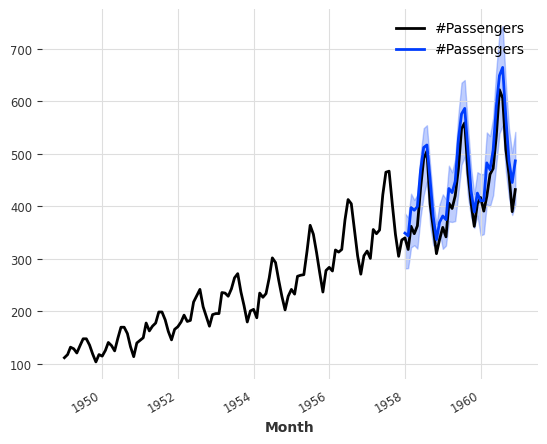

In [58]:
pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series_air.plot()
pred.plot()

print("MAPE del pronóstico de la mediana: %.2f" % mape(series_air, pred))
for rho in [0.05, 0.1, 0.5, 0.9, 0.95]:
    rr = rho_risk(series_air, pred, rho=rho)
    print("rho-risk at quantile %.2f: %.2f" % (rho, rr))

## <span style="color:blue">Ensamblando modelos</span> 

*Ensambalado* se trata de combinar los pronósticos producidos por varios modelos, para obtener un pronóstico final y, con suerte, mejor.

Por ejemplo, en nuestro ejemplo de un [modelo menos ingenuo anterior](#A-less-naive-model), combinamos manualmente un modelo estacional ingenuo con un modelo de tendencia ingenuo. Aquí, mostraremos cómo los pronósticos de los modelos se pueden combinar automáticamente, de manera ingenua usando un `NaiveEnsembleModel`, o aprendiendo usando `RegressionEnsembleModel`.

Por supuesto, también es posible usar `pasado` y/o `futuras_covariantes` con el modelo de conjunto, pero solo se pasarán a los modelos que los soportan cuando se llame a `fit()` y `predict()`.

#### <span style="color:#4CC9F0">Ensamble ingenuo</span> 

El ensamblaje ingenuo solo toma el promedio de los pronósticos de varios modelos. Darts proporciona un `NaiveEnsembleModel`, que permite hacer esto mientras se manipula solo un modelo de pronóstico (que, por ejemplo, permite una prueba retrospectiva más sencilla):

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 11.88


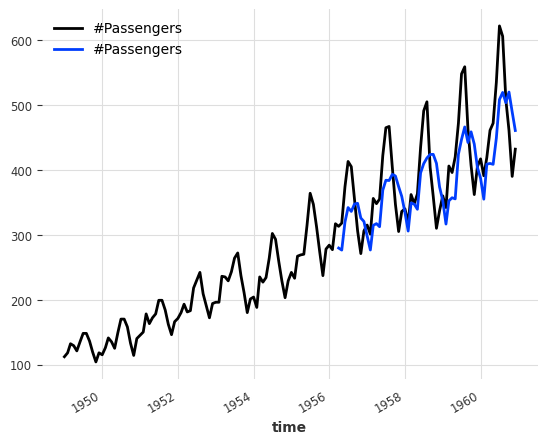

In [59]:
from darts.models import NaiveEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = NaiveEnsembleModel(models=models)

backtest = ensemble_model.historical_forecasts(
    series_air, start=0.6, forecast_horizon=3, verbose=True
)

print("MAPE = %.2f" % (mape(backtest, series_air)))
series_air.plot()
backtest.plot()

#### <span style="color:#4CC9F0">Ensamble aprendido</span> 

Como era de esperar en este caso, el conjunto ingenuo no da grandes resultados (¡aunque en algunos casos podría!)

A veces podemos hacerlo mejor si vemos el conjunto como un problema de regresión supervisado: dado un conjunto de pronósticos (características), encuentre un modelo que los combine para minimizar los errores en el objetivo.
Esto es lo que hace `RegressionEnsembleModel`. Acepta tres parámetros:

* `forecasting_models` es una lista de modelos de pronóstico cuyas predicciones queremos ensamblar.
* `regression_train_n_points` es el número de pasos de tiempo a usar para ajustar el modelo de "regresión de conjunto" (es decir, el modelo interno que combina los pronósticos).
* `regression_model` es, opcionalmente, un modelo de regresión compatible con sklearn o un `RegressionModel` de Darts que se utilizará para la regresión de conjunto. Si no se especifica, se utiliza una regresión lineal. Usar un modelo sklearn es fácil de usar, pero usar un `RegressionModel` permite potencialmente tomar retrasos arbitrarios de los pronósticos individuales como entradas del modelo de regresión.

Una vez que estos elementos están en su lugar, se puede usar un `RegressionEnsembleModel` como un modelo de pronóstico regular:

  0%|          | 0/57 [00:00<?, ?it/s]

MAPE = 4.85


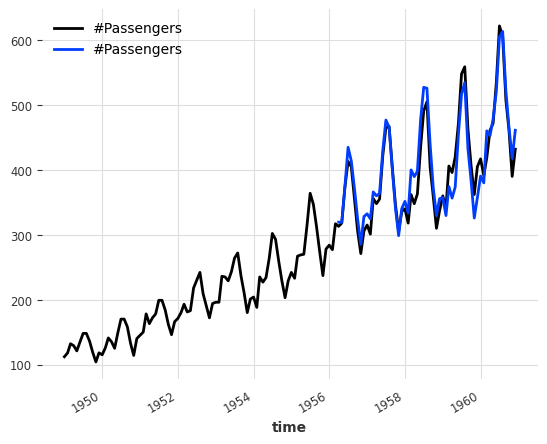

In [60]:
from darts.models import RegressionEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = RegressionEnsembleModel(
    forecasting_models=models, regression_train_n_points=12
)

backtest = ensemble_model.historical_forecasts(
    series_air, start=0.6, forecast_horizon=3, verbose=True
)

print("MAPE = %.2f" % (mape(backtest, series_air)))
series_air.plot()
backtest.plot()

We can also inspect the coefficients used to weigh the two inner models in the linear combination:

In [61]:
ensemble_model.fit(series_air)
ensemble_model.regression_model.model.coef_

array([0.01368787, 1.0980107 ], dtype=float32)

## <span style="color:blue">Modelos de filtrado</span> 

Además de los modelos de *pronóstico*, que son capaces de predecir valores futuros de series, Darts también contiene un par de modelos útiles de *filtrado*, que pueden modelar distribuciones de valores de series "en muestra".

### <span style="color:#4CC9F0">Implementación de un filtro Kalman</span> 

`KalmanFilter` implementa un [Kalman Filter](https://unit8co.github.io/darts/generated_api/darts.models.filtering.kalman_filter.html). La implementación se basa en [nfoursid](https://nfoursid.readthedocs.io/en/latest/source/kalman.html), por lo que es posible, por ejemplo, proporcionar un objeto `nfoursid.kalman.Kalman` que contenga una matriz de transición , covarianza de ruido de proceso, covarianza de ruido de observación, etc.

También es posible realizar la identificación del sistema llamando a `fit()` para "entrenar" el filtro Kalman utilizando el algoritmo de identificación del sistema N4SID:

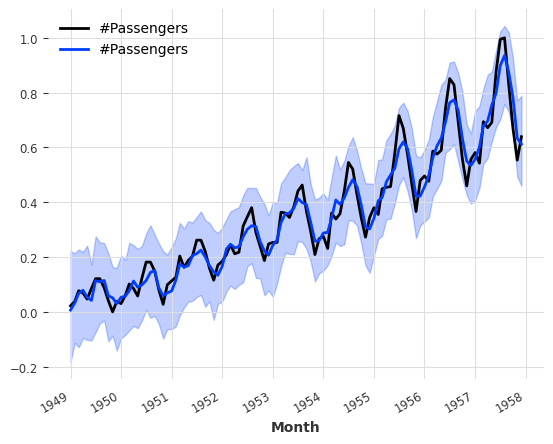

In [62]:
from darts.models import KalmanFilter

kf = KalmanFilter(dim_x=3)
kf.fit(train_air_scaled)
filtered_series = kf.filter(train_air_scaled, num_samples=100)

train_air_scaled.plot()
filtered_series.plot()

### <span style="color:#4CC9F0">Inferir valores faltantes con Procesos Gaussianos</span> 

Darts también contiene un `GaussianProcessFilter` que se puede usar para el modelado probabilístico de series:

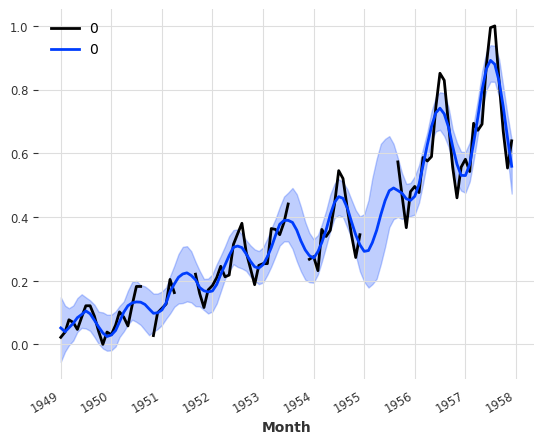

In [63]:
from darts.models import GaussianProcessFilter
from sklearn.gaussian_process.kernels import RBF

# create a series with holes:
values = train_air_scaled.values()
values[20:22] = np.nan
values[28:32] = np.nan
values[55:59] = np.nan
values[72:80] = np.nan
series_holes = TimeSeries.from_times_and_values(train_air_scaled.time_index, values)
series_holes.plot()

kernel = RBF()

gpf = GaussianProcessFilter(kernel=kernel, alpha=0.1, normalize_y=True)
filtered_series = gpf.filter(series_holes, num_samples=100)

filtered_series.plot()

## <span style="color:blue">Una palabra de precaución</span>  

Entonces, ¿N-BEATS, el suavizado exponencial o una regresión de cresta bayesiana entrenada en la producción de leche es el mejor enfoque para predecir el número futuro de pasajeros de aerolíneas? Bueno, en este punto es realmente difícil decir exactamente cuál es el mejor. Nuestra serie temporal es pequeña y nuestro conjunto de validación es aún más pequeño. En tales casos, es muy fácil adaptar todo el ejercicio de pronóstico a un conjunto de validación tan pequeño. Eso es especialmente cierto si la cantidad de modelos disponibles y sus grados de libertad es alta (como para los modelos de aprendizaje profundo) o si jugamos con muchos modelos en un solo conjunto de prueba (como se hizo en este portátil).

Como científicos de datos, es nuestra responsabilidad comprender hasta qué punto se puede confiar en nuestros modelos. Así que siempre tome los resultados con pinzas, especialmente en conjuntos de datos pequeños, y aplique el método científico antes de hacer cualquier tipo de pronóstico :) ¡Feliz modelado!